# Contexte :
L'entreprise pharmaceutique HumanForYou, basée en Inde et employant environ 4000 personnes, fait face à un taux de rotation annuel de 15 %. Ce turnover élevé entraîne des retards dans les projets, des coûts de recrutement accrus et une perte d'efficacité liée à la formation des nouveaux employés. La direction souhaite identifier les facteurs influençant ce phénomène afin de mettre en place des solutions pour améliorer la rétention des talents.

# Problématique :
Quels sont les principaux facteurs internes influençant le taux de rotation des employés et quelles actions peuvent être mises en œuvre pour le réduire ?

# Introduction

**Mesdames et Messieurs !**

Dans ce notebook, nous vous invitons à un voyage captivant au cœur du Machine Learning. Nous vous guiderons pas à pas à travers toutes les étapes clés du processus d'apprentissage automatique. Attachez vos ceintures, installez-vous confortablement, et laissez-nous vous plonger dans cet univers à la fois mystérieux et passionnant, où chaque découverte promet d'éveiller votre curiosité.

# Importation des données

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# Charger le dataset
general_data = pd.read_csv('general_data.csv')

general_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [5]:
manager_survey_data = pd.read_csv('manager_survey_data.csv')

manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [6]:
employee_survey_data = pd.read_csv('employee_survey_data.csv')

employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [7]:
in_time = pd.read_csv('in_time.csv')

in_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 09:43:45  2015-01-05 10:08:48   
1           2         NaN  2015-01-02 10:15:44  2015-01-05 10:21:05   
2           3         NaN  2015-01-02 10:17:41  2015-01-05 09:50:50   
3           4         NaN  2015-01-02 10:05:06  2015-01-05 09:56:32   
4           5         NaN  2015-01-02 10:28:17  2015-01-05 09:49:58   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 09:54:26  2015-01-07 09:34:31  2015-01-08 09:51:09   
1                  NaN  2015-01-07 09:45:17  2015-01-08 10:09:04   
2  2015-01-06 10:14:13  2015-01-07 09:47:27  2015-01-08 10:03:40   
3  2015-01-06 10:11:07  2015-01-07 09:37:30  2015-01-08 10:02:08   
4  2015-01-06 09:45:28  2015-01-07 09:49:37  2015-01-08 10:19:44   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 10:09:25  2015-01-12 09:42:53  2015-01-13 10:13:06  ...   
1  2015-01-09 09:43:26  2015-01-12 10:00:07  2015-01-13 10:43:29  ...   
2  2015-01-09 10:05:49  2015-01-12 10:03:47  2015-01-13 10:21:26  ...   
3  2015-01-09 10:08:12  2015-01-12 10:13:42  2015-01-13 09:53:22  ...   
4  2015-01-09 10:00:50  2015-01-12 10:29:27  2015-01-13 09:59:32  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 09:55:29  2015-12-22 10:04:06   
1  2015-12-18 10:37:17  2015-12-21 09:49:02  2015-12-22 10:33:51   
2  2015-12-18 10:15:14  2015-12-21 10:10:28  2015-12-22 09:44:44   
3  2015-12-18 10:17:38  2015-12-21 09:58:21  2015-12-22 10:04:25   
4  2015-12-18 09:58:35  2015-12-21 10:03:41  2015-12-22 10:10:30   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 10:14:27  2015-12-24 10:11:35        NaN  2015-12-28 10:13:41   
1  2015-12-23 10:12:10                  NaN        NaN  2015-12-28 09:31:45   
2  2015-12-23 10:15:54  2015-12-24 10:07:26        NaN  2015-12-28 09:42:05   
3  2015-12-23 10:11:46  2015-12-24 09:43:15        NaN  2015-12-28 09:52:44   
4  2015-12-23 10:13:36  2015-12-24 09:44:24        NaN  2015-12-28 10:05:15   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 10:03:36  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-29 09:55:49  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-29 09:43:36  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-29 09:33:16  2015-12-30 10:18:12  2015-12-31 10:01:15  
4  2015-12-29 10:30:53  2015-12-30 09:18:21  2015-12-31 09:41:09  

[5 rows x 262 columns]

In [8]:
out_time = pd.read_csv('out_time.csv')

out_time.head()

Unnamed: 0  2015-01-01           2015-01-02           2015-01-05  \
0           1         NaN  2015-01-02 16:56:15  2015-01-05 17:20:11   
1           2         NaN  2015-01-02 18:22:17  2015-01-05 17:48:22   
2           3         NaN  2015-01-02 16:59:14  2015-01-05 17:06:46   
3           4         NaN  2015-01-02 17:25:24  2015-01-05 17:14:03   
4           5         NaN  2015-01-02 18:31:37  2015-01-05 17:49:15   

            2015-01-06           2015-01-07           2015-01-08  \
0  2015-01-06 17:19:05  2015-01-07 16:34:55  2015-01-08 17:08:32   
1                  NaN  2015-01-07 17:09:06  2015-01-08 17:34:04   
2  2015-01-06 16:38:32  2015-01-07 16:33:21  2015-01-08 17:24:22   
3  2015-01-06 17:07:42  2015-01-07 16:32:40  2015-01-08 16:53:11   
4  2015-01-06 17:26:25  2015-01-07 17:37:59  2015-01-08 17:59:28   

            2015-01-09           2015-01-12           2015-01-13  ...  \
0  2015-01-09 17:38:29  2015-01-12 16:58:39  2015-01-13 18:02:58  ...   
1  2015-01-09 16:52:29  2015-01-12 17:36:48  2015-01-13 18:00:13  ...   
2  2015-01-09 16:57:30  2015-01-12 17:28:54  2015-01-13 17:21:25  ...   
3  2015-01-09 17:19:47  2015-01-12 17:13:37  2015-01-13 17:11:45  ...   
4  2015-01-09 17:44:08  2015-01-12 18:51:21  2015-01-13 18:14:58  ...   

            2015-12-18           2015-12-21           2015-12-22  \
0                  NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
1  2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
2  2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
3  2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
4  2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

            2015-12-23           2015-12-24 2015-12-25           2015-12-28  \
0  2015-12-23 16:44:44  2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
1  2015-12-23 17:38:18                  NaN        NaN  2015-12-28 17:08:38   
2  2015-12-23 16:59:43  2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
3  2015-12-23 17:36:35  2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
4  2015-12-23 18:00:49  2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

            2015-12-29           2015-12-30           2015-12-31  
0  2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
4  2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 262 columns]

In [9]:
# Aperçu rapide des colonnes et des types de données
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [10]:
# Vérifier les valeurs manquantes
general_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [12]:
manager_survey_data.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [13]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [14]:
employee_survey_data.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

# Préparation des Données
## 1. Traitement des Data Set de pointage

In [16]:
# Suppression de la colonne 'Unnamed: 0'
in_time_cleaned = in_time.drop(columns=['Unnamed: 0'])
out_time_cleaned = out_time.drop(columns=['Unnamed: 0'])

# Suppression des colonnes entièrement vides (toutes les valeurs NaN)
in_time_cleaned = in_time_cleaned.dropna(axis=1, how='all')
out_time_cleaned = out_time_cleaned.dropna(axis=1, how='all')

# Vérification des datasets nettoyés
print("InTime après nettoyage :")
in_time_cleaned.head()

InTime après nettoyage :


2015-01-02           2015-01-05           2015-01-06  \
0  2015-01-02 09:43:45  2015-01-05 10:08:48  2015-01-06 09:54:26   
1  2015-01-02 10:15:44  2015-01-05 10:21:05                  NaN   
2  2015-01-02 10:17:41  2015-01-05 09:50:50  2015-01-06 10:14:13   
3  2015-01-02 10:05:06  2015-01-05 09:56:32  2015-01-06 10:11:07   
4  2015-01-02 10:28:17  2015-01-05 09:49:58  2015-01-06 09:45:28   

            2015-01-07           2015-01-08           2015-01-09  \
0  2015-01-07 09:34:31  2015-01-08 09:51:09  2015-01-09 10:09:25   
1  2015-01-07 09:45:17  2015-01-08 10:09:04  2015-01-09 09:43:26   
2  2015-01-07 09:47:27  2015-01-08 10:03:40  2015-01-09 10:05:49   
3  2015-01-07 09:37:30  2015-01-08 10:02:08  2015-01-09 10:08:12   
4  2015-01-07 09:49:37  2015-01-08 10:19:44  2015-01-09 10:00:50   

            2015-01-12           2015-01-13           2015-01-15  \
0  2015-01-12 09:42:53  2015-01-13 10:13:06  2015-01-15 10:01:24   
1  2015-01-12 10:00:07  2015-01-13 10:43:29  2015-01-15 09:37:57   
2  2015-01-12 10:03:47  2015-01-13 10:21:26  2015-01-15 09:55:11   
3  2015-01-12 10:13:42  2015-01-13 09:53:22  2015-01-15 10:00:50   
4  2015-01-12 10:29:27  2015-01-13 09:59:32  2015-01-15 10:06:12   

            2015-01-16  ...           2015-12-17           2015-12-18  \
0  2015-01-16 10:19:08  ...                  NaN                  NaN   
1  2015-01-16 09:57:18  ...  2015-12-17 09:15:08  2015-12-18 10:37:17   
2  2015-01-16 10:05:36  ...  2015-12-17 09:53:17  2015-12-18 10:15:14   
3  2015-01-16 09:58:06  ...  2015-12-17 09:54:36  2015-12-18 10:17:38   
4  2015-01-16 10:03:50  ...  2015-12-17 09:46:35  2015-12-18 09:58:35   

            2015-12-21           2015-12-22           2015-12-23  \
0  2015-12-21 09:55:29  2015-12-22 10:04:06  2015-12-23 10:14:27   
1  2015-12-21 09:49:02  2015-12-22 10:33:51  2015-12-23 10:12:10   
2  2015-12-21 10:10:28  2015-12-22 09:44:44  2015-12-23 10:15:54   
3  2015-12-21 09:58:21  2015-12-22 10:04:25  2015-12-23 10:11:46   
4  2015-12-21 10:03:41  2015-12-22 10:10:30  2015-12-23 10:13:36   

            2015-12-24           2015-12-28           2015-12-29  \
0  2015-12-24 10:11:35  2015-12-28 10:13:41  2015-12-29 10:03:36   
1                  NaN  2015-12-28 09:31:45  2015-12-29 09:55:49   
2  2015-12-24 10:07:26  2015-12-28 09:42:05  2015-12-29 09:43:36   
3  2015-12-24 09:43:15  2015-12-28 09:52:44  2015-12-29 09:33:16   
4  2015-12-24 09:44:24  2015-12-28 10:05:15  2015-12-29 10:30:53   

            2015-12-30           2015-12-31  
0  2015-12-30 09:54:12  2015-12-31 10:12:44  
1  2015-12-30 10:32:25  2015-12-31 09:27:20  
2  2015-12-30 09:34:05  2015-12-31 10:28:39  
3  2015-12-30 10:18:12  2015-12-31 10:01:15  
4  2015-12-30 09:18:21  2015-12-31 09:41:09  

[5 rows x 249 columns]

In [17]:
print("\nOutTime après nettoyage :")
out_time_cleaned.head()


OutTime après nettoyage :


2015-01-02           2015-01-05           2015-01-06  \
0  2015-01-02 16:56:15  2015-01-05 17:20:11  2015-01-06 17:19:05   
1  2015-01-02 18:22:17  2015-01-05 17:48:22                  NaN   
2  2015-01-02 16:59:14  2015-01-05 17:06:46  2015-01-06 16:38:32   
3  2015-01-02 17:25:24  2015-01-05 17:14:03  2015-01-06 17:07:42   
4  2015-01-02 18:31:37  2015-01-05 17:49:15  2015-01-06 17:26:25   

            2015-01-07           2015-01-08           2015-01-09  \
0  2015-01-07 16:34:55  2015-01-08 17:08:32  2015-01-09 17:38:29   
1  2015-01-07 17:09:06  2015-01-08 17:34:04  2015-01-09 16:52:29   
2  2015-01-07 16:33:21  2015-01-08 17:24:22  2015-01-09 16:57:30   
3  2015-01-07 16:32:40  2015-01-08 16:53:11  2015-01-09 17:19:47   
4  2015-01-07 17:37:59  2015-01-08 17:59:28  2015-01-09 17:44:08   

            2015-01-12           2015-01-13           2015-01-15  \
0  2015-01-12 16:58:39  2015-01-13 18:02:58  2015-01-15 17:22:13   
1  2015-01-12 17:36:48  2015-01-13 18:00:13  2015-01-15 17:14:44   
2  2015-01-12 17:28:54  2015-01-13 17:21:25  2015-01-15 17:21:29   
3  2015-01-12 17:13:37  2015-01-13 17:11:45  2015-01-15 16:53:26   
4  2015-01-12 18:51:21  2015-01-13 18:14:58  2015-01-15 18:21:48   

            2015-01-16  ...           2015-12-17           2015-12-18  \
0  2015-01-16 17:35:11  ...                  NaN                  NaN   
1  2015-01-16 17:40:57  ...  2015-12-17 17:10:50  2015-12-18 18:31:28   
2  2015-01-16 17:18:13  ...  2015-12-17 17:06:23  2015-12-18 17:02:23   
3  2015-01-16 16:52:34  ...  2015-12-17 17:21:57  2015-12-18 17:55:23   
4  2015-01-16 18:28:03  ...  2015-12-17 18:05:47  2015-12-18 17:52:48   

            2015-12-21           2015-12-22           2015-12-23  \
0  2015-12-21 17:15:50  2015-12-22 17:27:51  2015-12-23 16:44:44   
1  2015-12-21 17:34:16  2015-12-22 18:16:35  2015-12-23 17:38:18   
2  2015-12-21 17:20:17  2015-12-22 16:32:50  2015-12-23 16:59:43   
3  2015-12-21 16:49:09  2015-12-22 17:24:00  2015-12-23 17:36:35   
4  2015-12-21 17:43:35  2015-12-22 18:07:57  2015-12-23 18:00:49   

            2015-12-24           2015-12-28           2015-12-29  \
0  2015-12-24 17:47:22  2015-12-28 18:00:07  2015-12-29 17:22:30   
1                  NaN  2015-12-28 17:08:38  2015-12-29 17:54:46   
2  2015-12-24 16:58:25  2015-12-28 16:43:31  2015-12-29 17:09:56   
3  2015-12-24 16:48:21  2015-12-28 17:19:34  2015-12-29 16:58:16   
4  2015-12-24 17:59:22  2015-12-28 17:44:59  2015-12-29 18:47:00   

            2015-12-30           2015-12-31  
0  2015-12-30 17:40:56  2015-12-31 17:17:33  
1  2015-12-30 18:31:35  2015-12-31 17:40:58  
2  2015-12-30 17:06:25  2015-12-31 17:15:50  
3  2015-12-30 17:40:11  2015-12-31 17:09:14  
4  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 249 columns]

## 2. Création de collones via les Data Set de pointage 

In [19]:
# Convertir les colonnes en datetime pour pouvoir faire des calculs sur les heures
in_time_cleaned = in_time_cleaned.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')  # Exclure la première colonne si elle est un index
out_time_cleaned = out_time_cleaned.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

# Calcul des heures travaillées pour chaque jour (sortie - entrée)
hours_worked_per_day = (out_time_cleaned - in_time_cleaned).apply(lambda x: x.dt.total_seconds() / 3600, axis=1)  # Conversion en heures

# Création des colonnes demandées
#general_data['all_hours_worked'] = hours_worked_per_day.sum(axis=1)  # Total des heures travaillées
general_data['average_daily_hours'] = hours_worked_per_day.mean(axis=1)  # Moyenne des heures par jour
general_data['absent_days'] = hours_worked_per_day.isnull().sum(axis=1)  # Nombre de jours d'absence

# Vérification du nouveau dataframe
print(general_data[['average_daily_hours', 'absent_days']].head())

   average_daily_hours  absent_days
0             7.374366           17
1             7.717309           13
2             7.014571            7
3             7.193060           14
4             8.005972            4


## 3. Gestion des valeurs manquantes et Fusionner les datasets
### 3.1 Fusionner les datasets

In [21]:
# Fusionner les datasets sur la colonne 'EmployeeID'
merged_data = pd.merge(general_data, manager_survey_data, on='EmployeeID', how='left')
merged_data = pd.merge(merged_data, employee_survey_data, on='EmployeeID', how='left')

# Afficher les premières lignes du dataframe fusionné
merged_data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   YearsAtCompany YearsSinceLastPromotion YearsWithCurrManager  \
0               1                       0                    0   
1               5                       1                    4   
2               5                       0                    3   
3               8                       7                    5   
4               6                       0                    4   

   average_daily_hours  absent_days JobInvolvement  PerformanceRating  \
0             7.374366           17              3                  3   
1             7.717309           13              2                  4   
2             7.014571            7              3                  3   
3             7.193060           14              2                  3   
4             8.005972            4              3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
0                      3.0              4.0              2.0  
1                      3.0              2.0              4.0  
2                      2.0              2.0              1.0  
3                      4.0              4.0              3.0  
4                      4.0              1.0              3.0  

[5 rows x 31 columns]

In [22]:
merged_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
average_daily_hours         0
absent_days                 0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

### 3.2 Gerer les valeurs manquantes 

In [24]:
from sklearn.impute import SimpleImputer
# Créer un imputer pour les valeurs manquantes
imputer = SimpleImputer(strategy='median')

# Sélectionner les colonnes numériques
num_columns = merged_data.select_dtypes(include=[np.number])

# Appliquer l'imputer sur les colonnes numériques
imputer.fit(num_columns)

# Remplacer les valeurs manquantes
merged_data_imputed = pd.DataFrame(imputer.transform(num_columns), columns=num_columns.columns)

# Remplacer les colonnes imputées dans le dataset fusionné
merged_data[num_columns.columns] = merged_data_imputed

# Vérifier s'il reste des valeurs manquantes après l'imputation
print(merged_data.isnull().sum())

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
average_daily_hours        0
absent_days                0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


## 4. Encodage des variables catégorielles

In [26]:
label_encoder = LabelEncoder()

# Encoder la colonne'Attrition'
merged_data['Attrition'] = label_encoder.fit_transform(merged_data['Attrition'])

# Sélectionner les colonnes catégoriques restantes (excluant 'Attrition')
cat_columns = merged_data.select_dtypes(include=[object])

# Initialiser l'encodeur One-Hot
encoder = OneHotEncoder()

# Appliquer l'encodage One-Hot aux colonnes catégoriques restantes
encoded_data = pd.DataFrame(encoder.fit_transform(cat_columns).toarray(), columns=encoder.get_feature_names_out())

# Afficher les premières lignes des données encodées
encoded_data.head()

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                        0.0                               0.0   
1                        0.0                               1.0   
2                        0.0                               1.0   
3                        1.0                               0.0   
4                        0.0                               0.0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                           1.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           1.0                         0.0   

   Department_Research & Development  Department_Sales  \
0                                0.0               1.0   
1                                1.0               0.0   
2                                1.0               0.0   
3                                1.0               0.0   
4                                1.0               0.0   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                             0.0                           1.0   
1                             0.0                           1.0   
2                             0.0                           0.0   
3                             0.0                           1.0   
4                             0.0                           0.0   

   EducationField_Marketing  EducationField_Medical  ...  JobRole_Manager  \
0                       0.0                     0.0  ...              0.0   
1                       0.0                     0.0  ...              0.0   
2                       0.0                     0.0  ...              0.0   
3                       0.0                     0.0  ...              0.0   
4                       0.0                     1.0  ...              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   
2                         0.0                      1.0   
3                         0.0                      0.0   
4                         0.0                      1.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  Over18_Y  
0                    1.0                   0.0       1.0  
1                    0.0                   1.0       1.0  
2                    1.0                   0.0       1.0  
3                    1.0                   0.0       1.0  
4                    0.0                   1.0       1.0  

[5 rows x 27 columns]

## 5.Normalisation des données

In [28]:
# Sélectionner uniquement les colonnes numériques dans merged_data
numerical_columns = merged_data.select_dtypes(include=[np.number]).columns

# Normalisation des colonnes numériques
scaler = StandardScaler()
merged_data_scaled = pd.DataFrame(scaler.fit_transform(merged_data[numerical_columns]), columns=numerical_columns)

# Vérification de la normalisation
merged_data_scaled.head()

Age  Attrition  DistanceFromHome  Education  EmployeeCount  \
0  1.541369  -0.438422         -0.393938  -0.891688            0.0   
1 -0.648668   2.280906          0.099639  -1.868426            0.0   
2 -0.539166  -0.438422          0.963398   1.061787            0.0   
3  0.117845  -0.438422         -0.887515   2.038524            0.0   
4 -0.539166  -0.438422          0.099639  -1.868426            0.0   

   EmployeeID  JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0   -1.731658 -0.961486       1.405136           -0.678464          -1.150554   
1   -1.730873 -0.961486      -0.491661           -1.079486           2.129306   
2   -1.730087  1.749610       2.725053           -0.678464          -0.057267   
3   -1.729302  0.845911       0.386301            0.123580          -1.150554   
4   -1.728516 -0.961486      -0.884109            0.524602          -0.877232   

   ...  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
0  ...       -0.981014                -0.679146             -1.155935   
1  ...       -0.327893                -0.368715             -0.034520   
2  ...       -0.327893                -0.679146             -0.314873   
3  ...        0.161947                 1.493867              0.245834   
4  ...       -0.164613                -0.679146             -0.034520   

   average_daily_hours  absent_days  JobInvolvement  PerformanceRating  \
0            -0.243606     0.786847        0.379672          -0.426230   
1             0.012304     0.057051       -1.026167           2.346151   
2            -0.512093    -1.037642        0.379672          -0.426230   
3            -0.378901     0.239500       -1.026167          -0.426230   
4             0.227711    -1.584988        0.379672          -0.426230   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  
0                 0.252200         1.156302        -1.085336  
1                 0.252200        -0.663899         1.757749  
2                -0.665460        -0.663899        -2.506879  
3                 1.169861         1.156302         0.336206  
4                 1.169861        -1.573999         0.336206  

[5 rows x 24 columns]

## 6. Assemblage des données préparées

In [30]:
# Concatenation des colonnes numériques normalisées et des colonnes catégorielles encodées
merged_data_prepared = pd.concat([merged_data_scaled, encoded_data], axis=1)

# Suppression des colonnes spécifiques
columns_to_drop = ['Over18_Y', 'EmployeeCount', 'StandardHours', 'EmployeeID']

merged_data_prepared = merged_data_prepared.drop(columns=columns_to_drop)
merged_data_prepared["Attrition"] =merged_data["Attrition"]

# Vérification des données assemblées
merged_data_prepared.head()

Age  Attrition  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
0  1.541369          0         -0.393938  -0.891688 -0.961486       1.405136   
1 -0.648668          1          0.099639  -1.868426 -0.961486      -0.491661   
2 -0.539166          0          0.963398   1.061787  1.749610       2.725053   
3  0.117845          0         -0.887515   2.038524  0.845911       0.386301   
4 -0.539166          0          0.099639  -1.868426 -0.961486      -0.884109   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0           -0.678464          -1.150554         -0.932014          -1.322079   
1           -1.079486           2.129306          0.241988          -0.678877   
2           -0.678464          -0.057267          2.589994          -0.807517   
3            0.123580          -1.150554          2.589994           0.221606   
4            0.524602          -0.877232          1.415991          -0.292956   

   ...  JobRole_Laboratory Technician  JobRole_Manager  \
0  ...                            0.0              0.0   
1  ...                            0.0              0.0   
2  ...                            0.0              0.0   
3  ...                            0.0              0.0   
4  ...                            0.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      0.0   
1                         1.0                      0.0   
2                         0.0                      1.0   
3                         0.0                      0.0   
4                         0.0                      1.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  
0                    1.0                   0.0  
1                    0.0                   1.0  
2                    1.0                   0.0  
3                    1.0                   0.0  
4                    0.0                   1.0  

[5 rows x 47 columns]

In [31]:
print(merged_data_prepared[['Attrition', 'average_daily_hours', 'absent_days']].head())

   Attrition  average_daily_hours  absent_days
0          0            -0.243606     0.786847
1          1             0.012304     0.057051
2          0            -0.512093    -1.037642
3          0            -0.378901     0.239500
4          0             0.227711    -1.584988


## 7. Gerer Les OutLiers

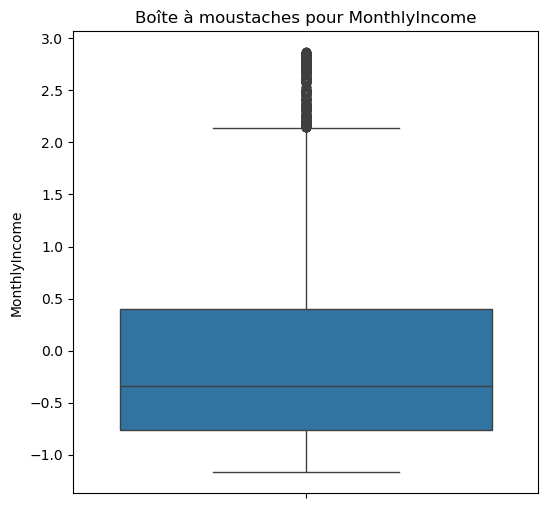

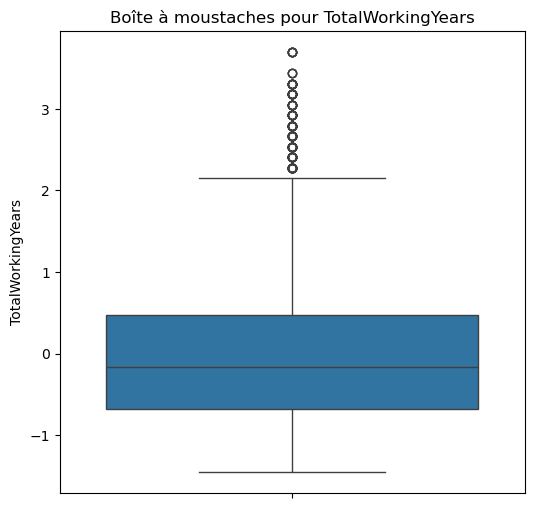

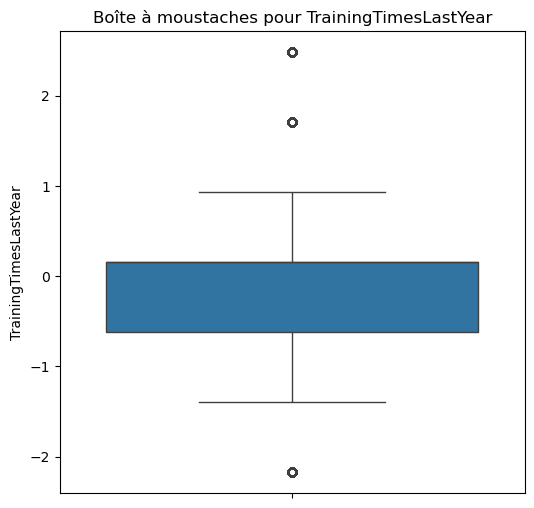

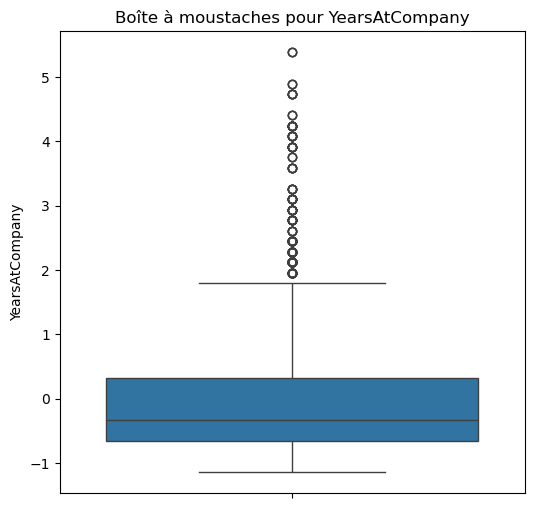

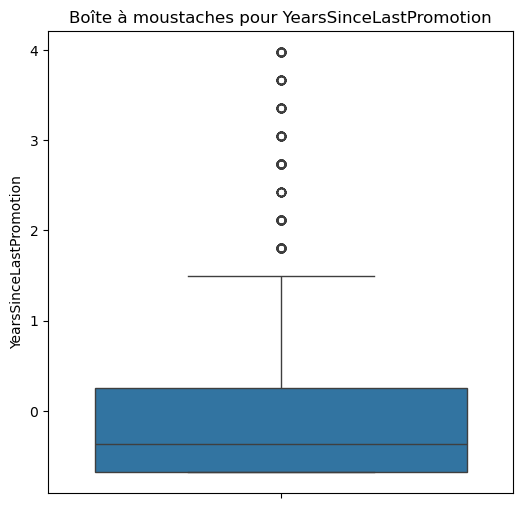

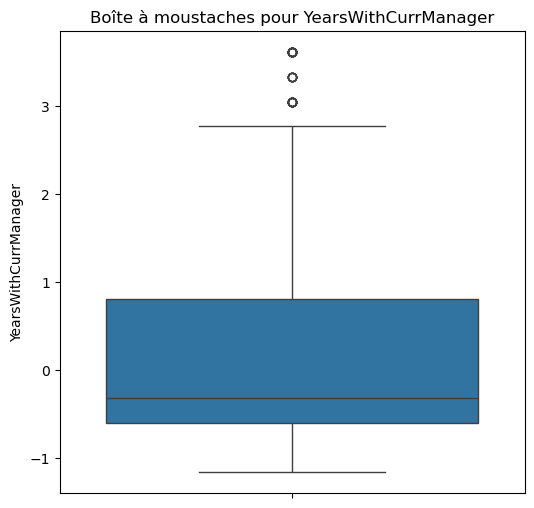

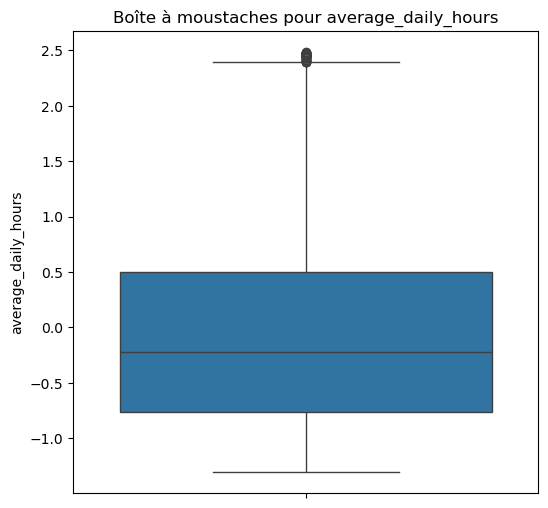

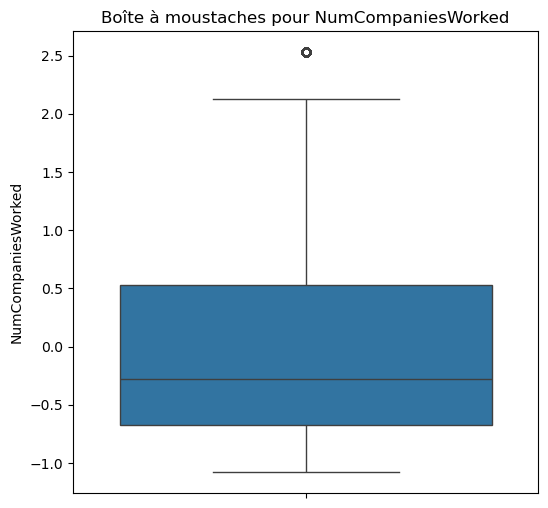

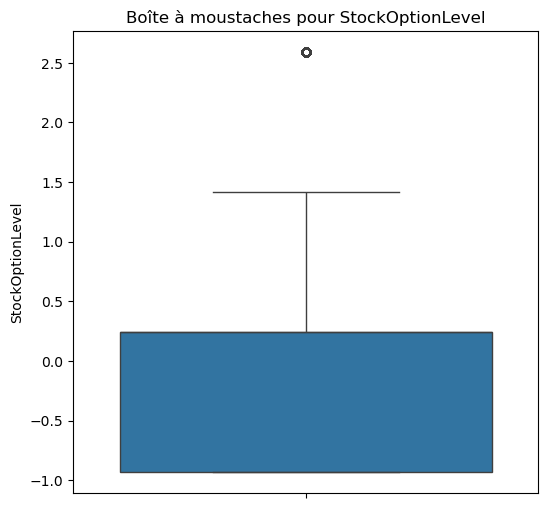

In [33]:
columns_to_plot = ['MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','average_daily_hours', 
                 'NumCompaniesWorked', 'StockOptionLevel']

# Création des graphiques boîte à moustaches
for column in columns_to_plot:
    plt.figure(figsize=(6, 6))  
    sns.boxplot(data=merged_data_prepared, y=column)  
    plt.title(f"Boîte à moustaches pour {column}") 
    plt.ylabel(column) 
    plt.show() 

In [34]:
# Liste des colonnes à traiter
cols_to_treat = ['TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'average_daily_hours', 
                 'NumCompaniesWorked', 'StockOptionLevel']

# Fonction pour traiter les outliers via les bornes des quantiles (IQR)
def handle_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Limiter les valeurs aux bornes
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Appliquer la gestion des outliers uniquement aux colonnes spécifiées
merged_data_prepared = handle_outliers_iqr(merged_data_prepared, cols_to_treat)

# Vérifier les résultats après traitement
merged_data_prepared[cols_to_treat].describe()

TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        4410.000000            4410.000000     4410.000000   
mean           -0.022709              -0.068617       -0.063757   
std             0.938727               0.805162        0.814549   
min            -1.450719              -1.784034       -1.144294   
25%            -0.678877              -0.620189       -0.654454   
50%            -0.164315               0.155707       -0.327893   
75%             0.478886               0.155707        0.325228   
max             2.215532               1.319552        1.794749   

       YearsSinceLastPromotion  YearsWithCurrManager  average_daily_hours  \
count              4410.000000           4410.000000          4410.000000   
mean                 -0.082253             -0.004386            -0.000431   
std                   0.769141              0.985917             0.999065   
min                  -0.679146             -1.155935            -1.306189   
25%                  -0.679146             -0.595227            -0.767137   
50%                  -0.368715             -0.314873            -0.218976   
75%                   0.252146              0.806541             0.498894   
max                   1.649082              2.909195             2.397941   

       NumCompaniesWorked  StockOptionLevel  
count         4410.000000       4410.000000  
mean            -0.007093         -0.033942  
std              0.982703          0.918228  
min             -1.079486         -0.932014  
25%             -0.678464         -0.932014  
50%             -0.277442          0.241988  
75%              0.524602          0.241988  
max              2.329201          2.002992

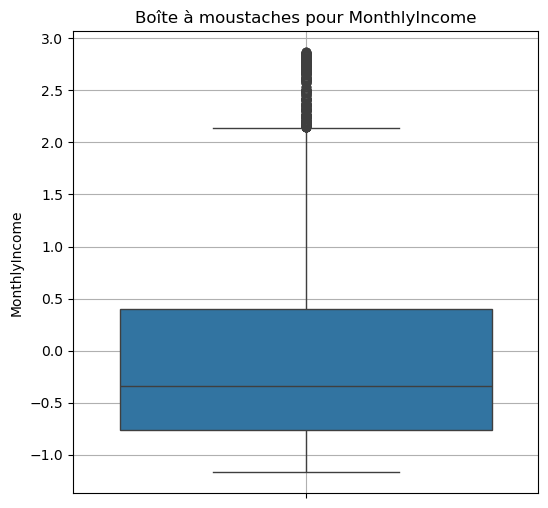

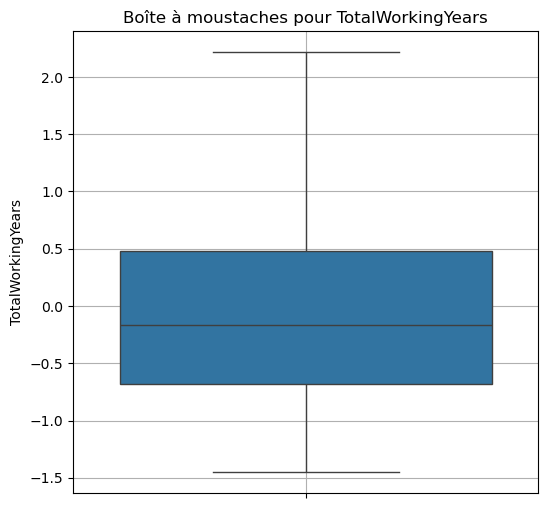

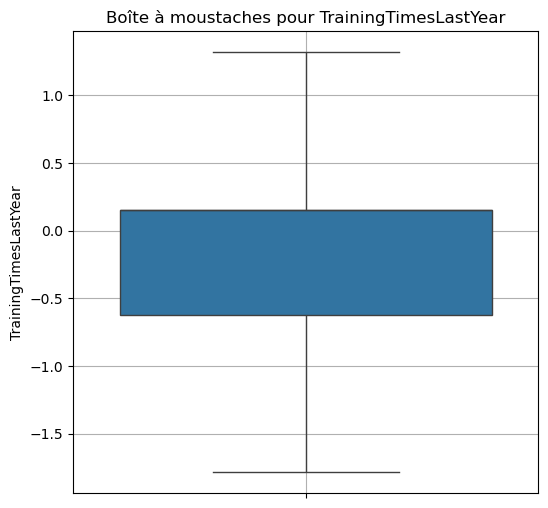

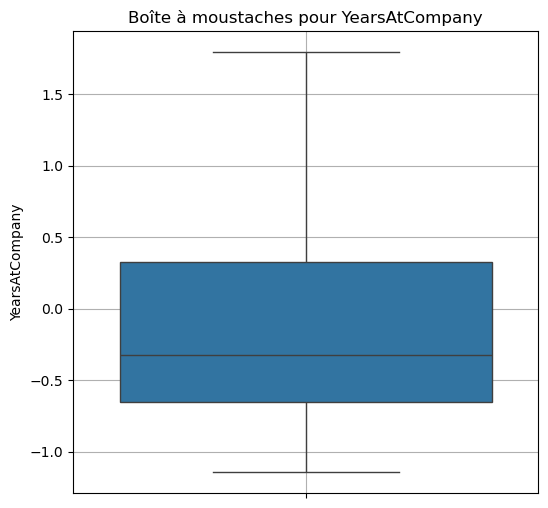

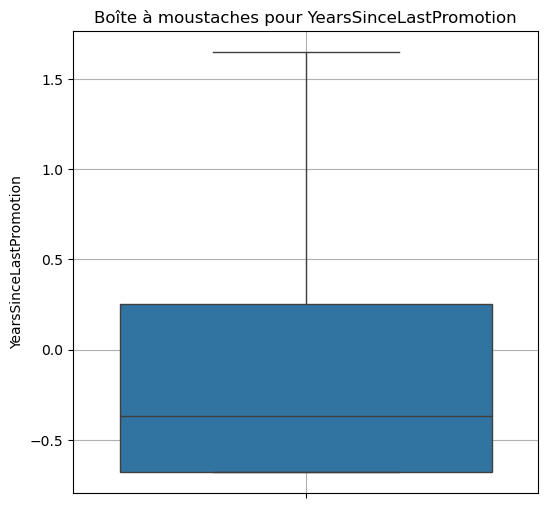

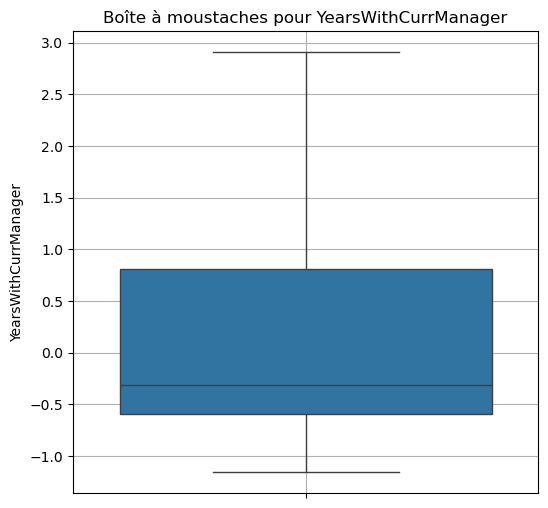

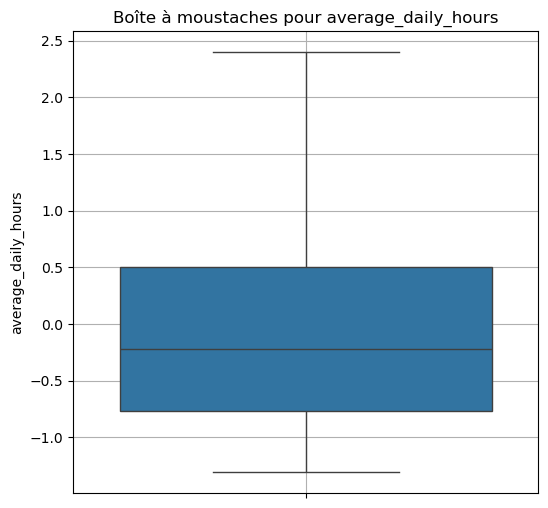

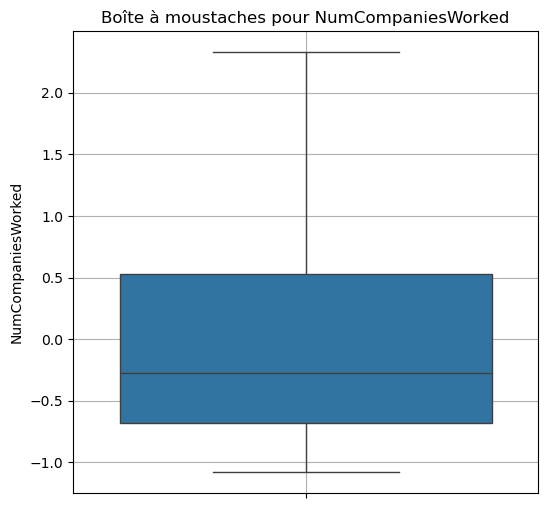

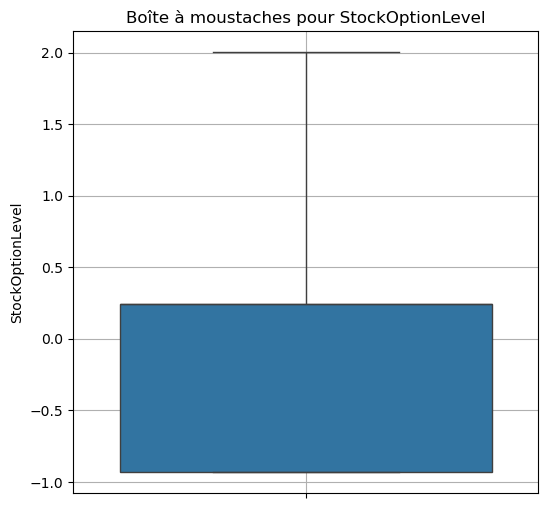

In [35]:
columns_to_plot = ['MonthlyIncome', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'average_daily_hours', 
                 'NumCompaniesWorked', 'StockOptionLevel']

# Création des graphiques boîte à moustaches
for column in columns_to_plot:
    plt.figure(figsize=(6, 6))  
    sns.boxplot(data=merged_data_prepared, y=column)  
    plt.title(f"Boîte à moustaches pour {column}") 
    plt.ylabel(column) 
    plt.grid(True)
    plt.show() 

## 8. Séparation des caractéristiques (X) et de la cible (y)

In [37]:
# Séparation des caractéristiques et de la cible

X = merged_data_prepared.drop(["Attrition"], axis=1)

y = merged_data_prepared["Attrition"]

# Vérification des dimensions
print(X.shape)
print(y.shape)

(4410, 46)
(4410,)


# Exploration et Visualisation des Données
## 1. Visualisation des Variables Numériques

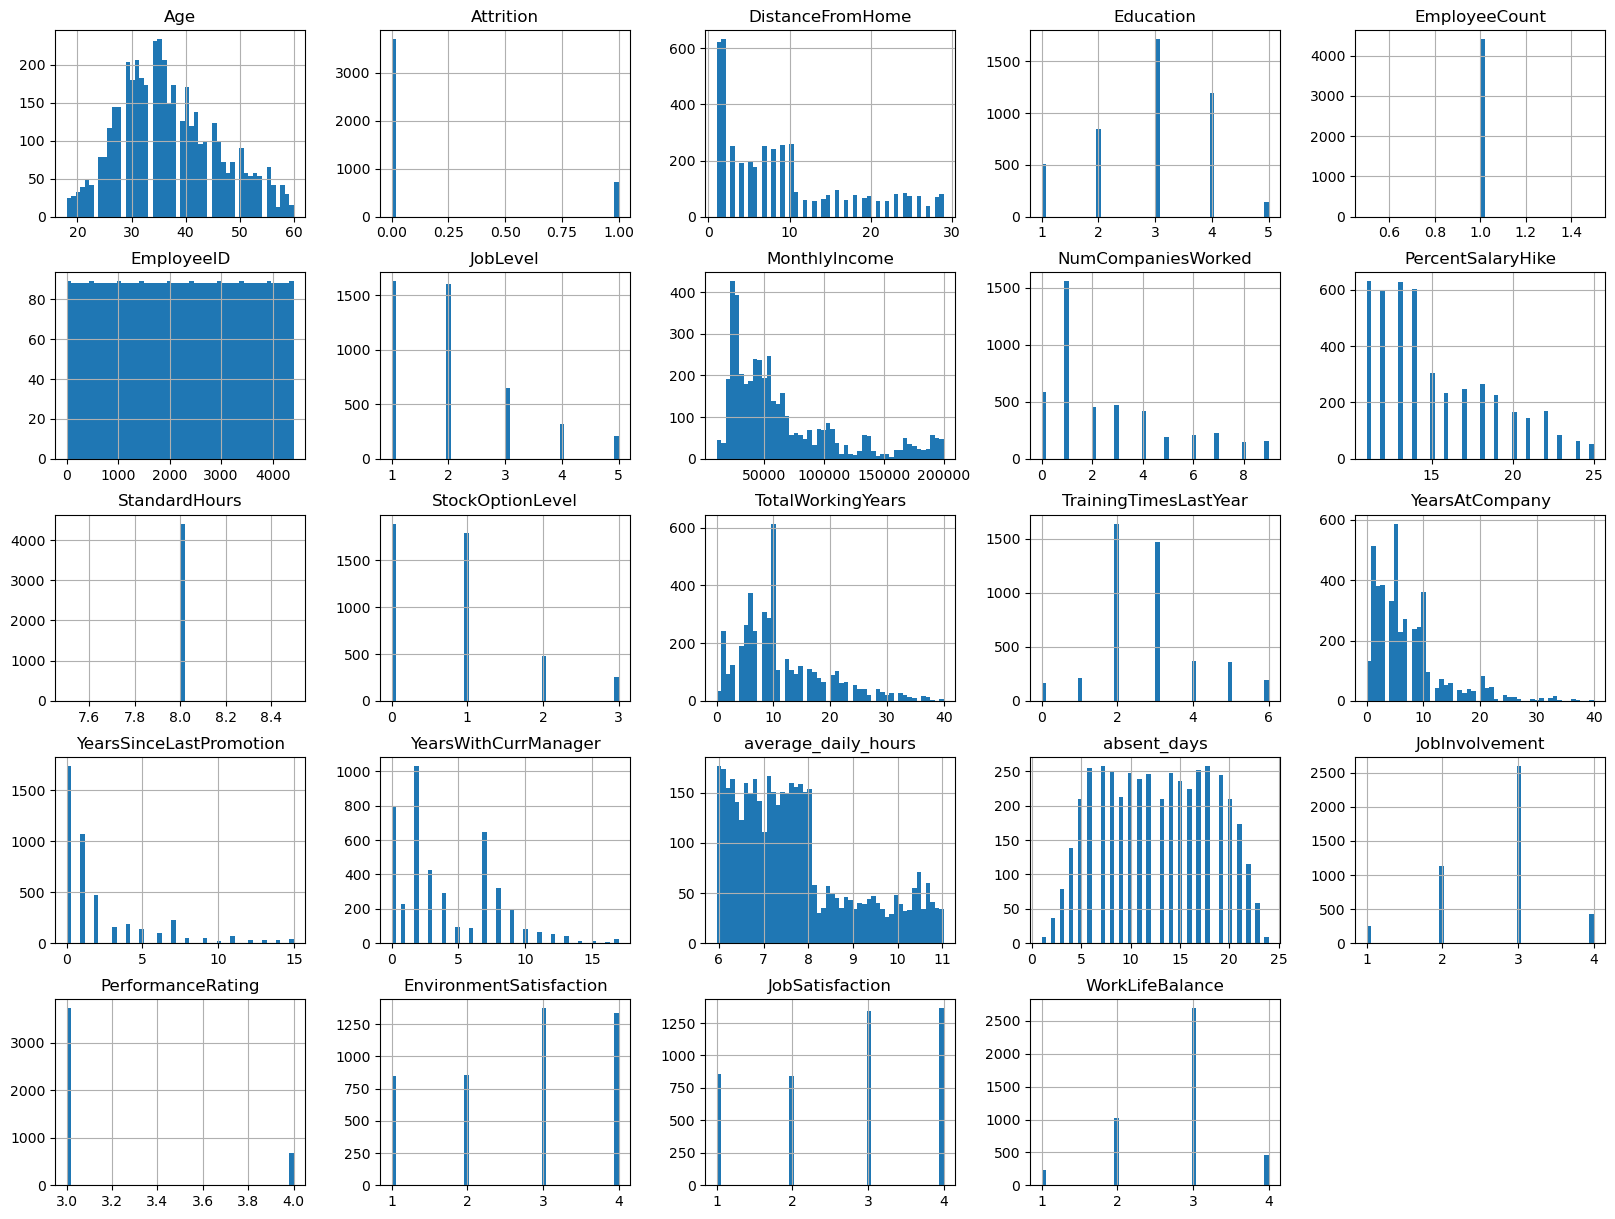

In [39]:
merged_data.hist(bins=50, figsize=(20, 15))
plt.show()

## 2. Matrice de Corrélation

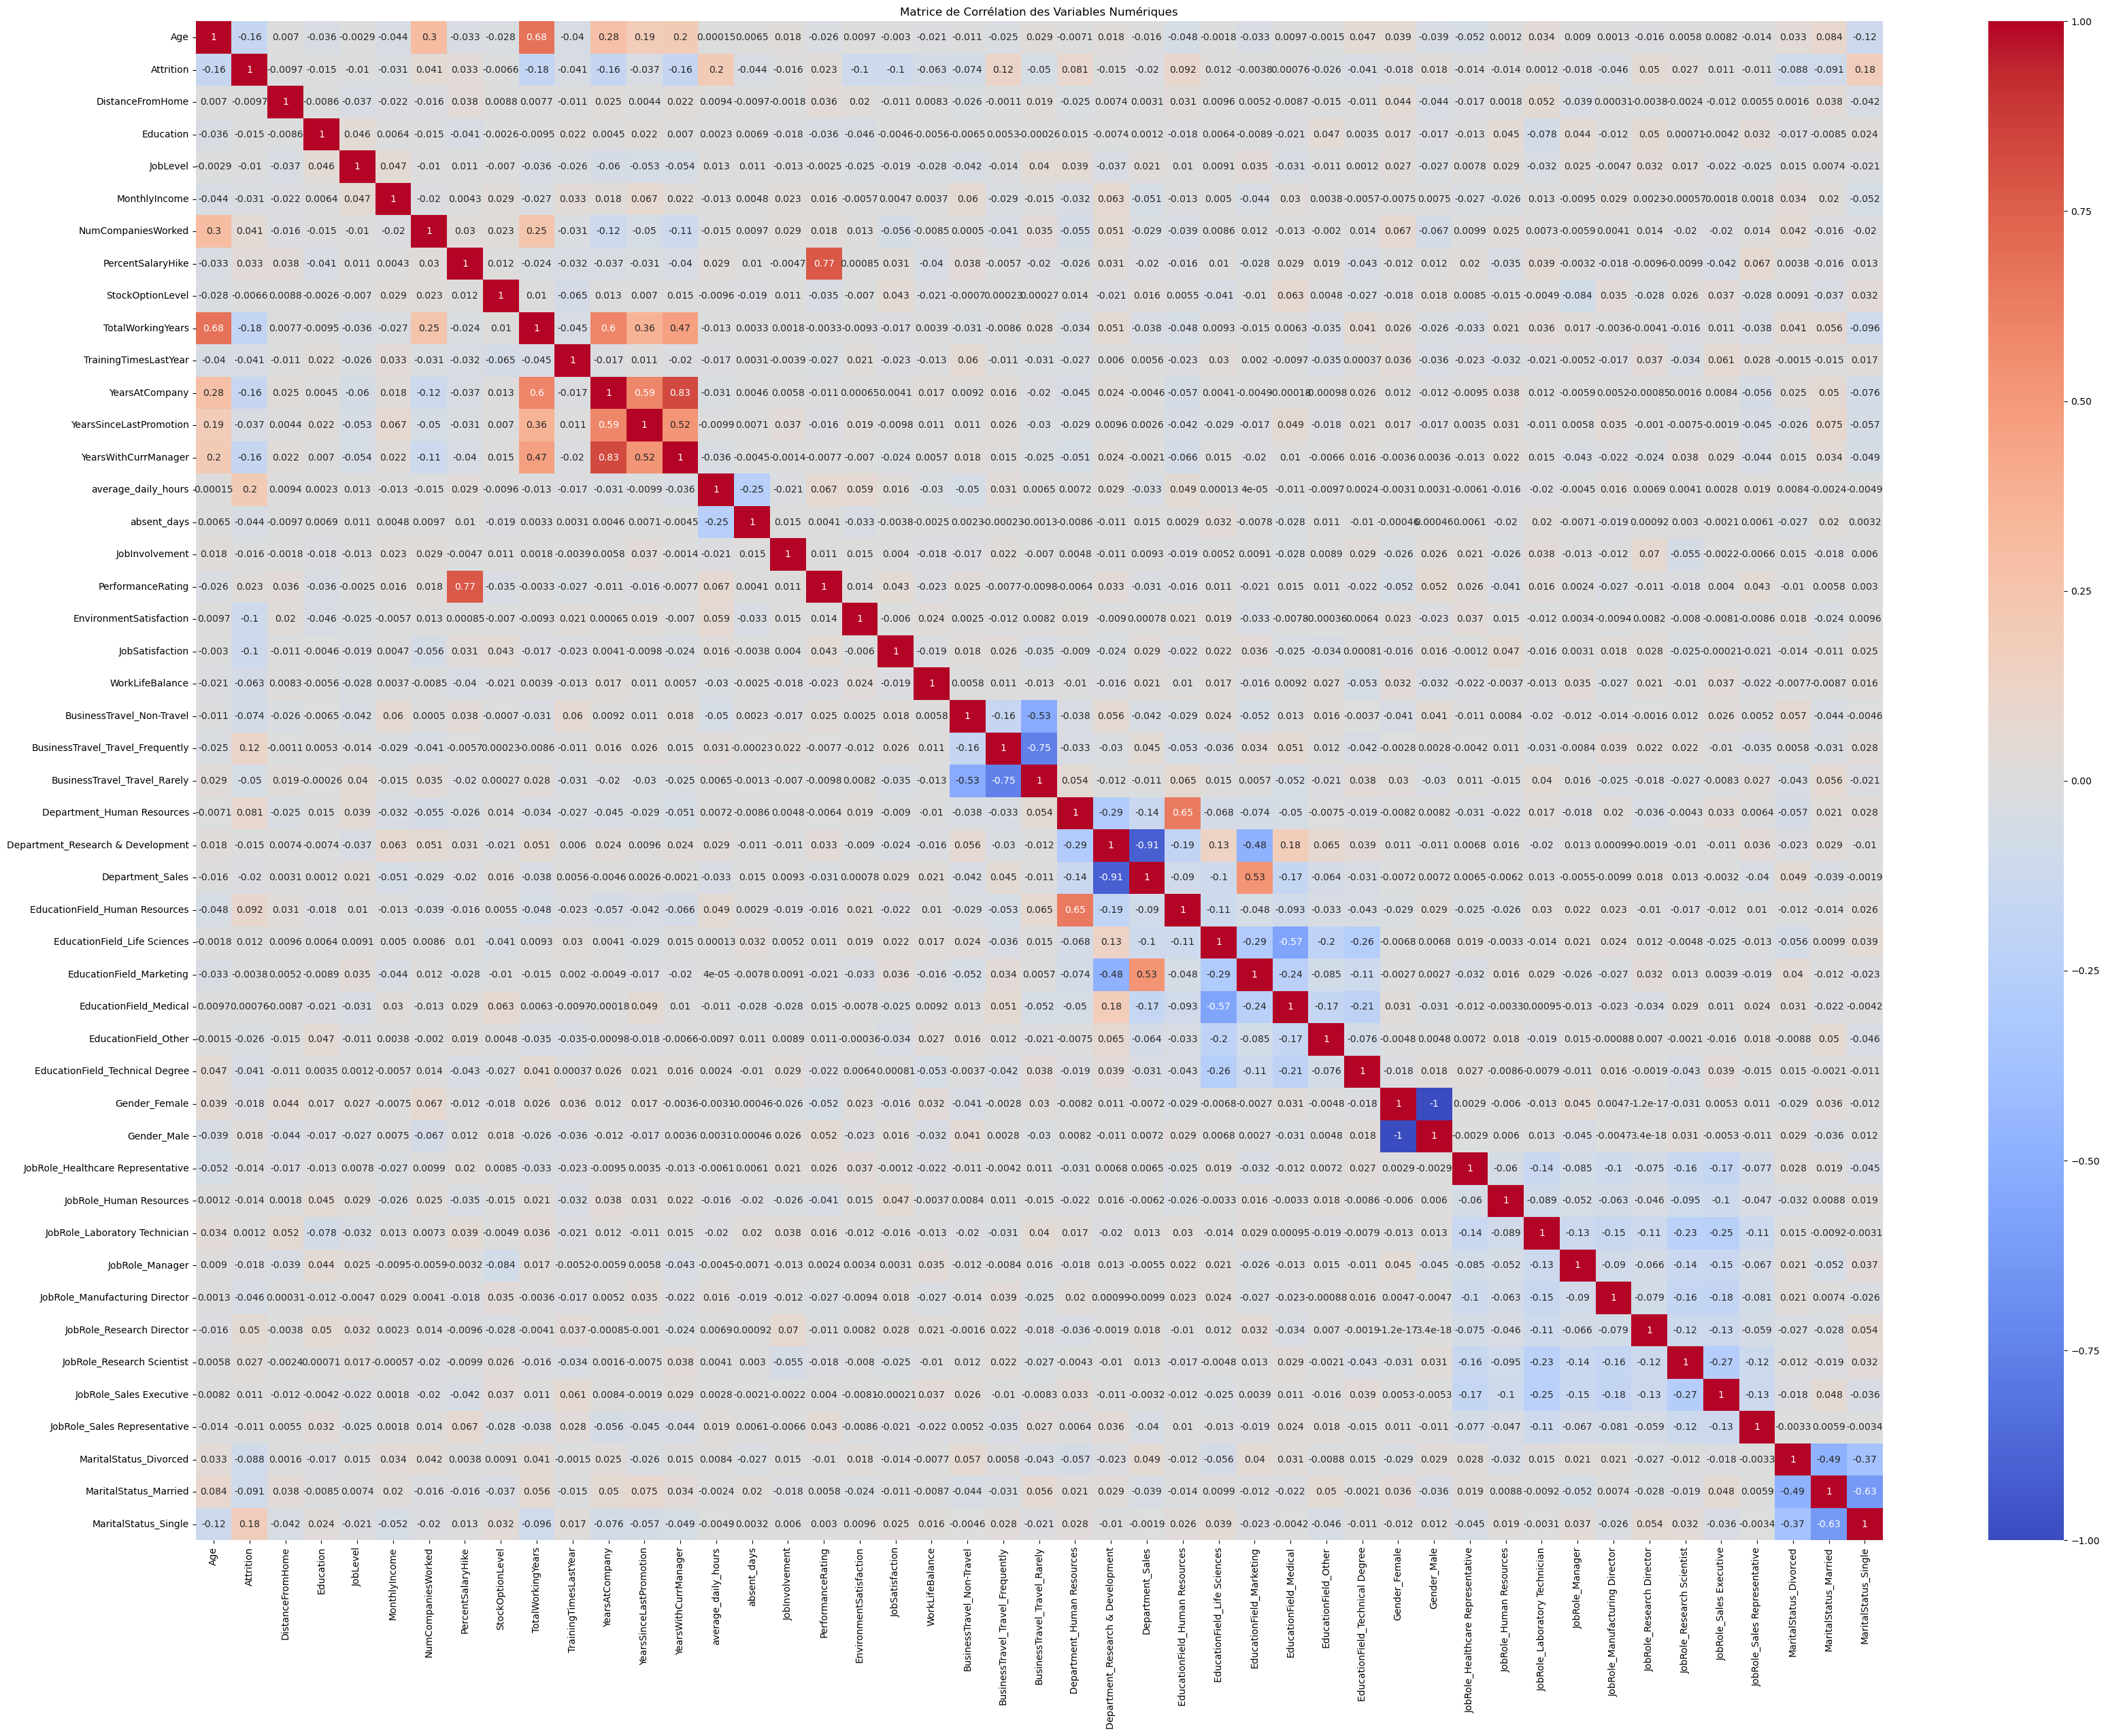

In [41]:
corr_matrix = merged_data_prepared.corr()

plt.figure(figsize=(40, 29))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Matrice de Corrélation des Variables Numériques')
plt.show()

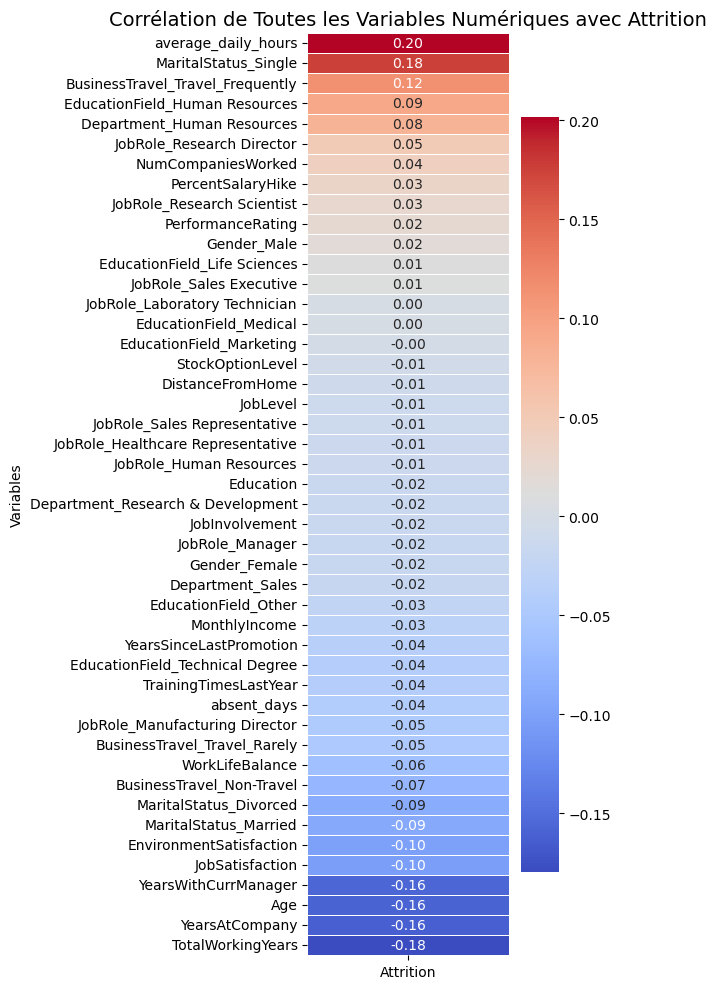

In [42]:
attrition_corr = corr_matrix["Attrition"].drop("Attrition").sort_values(ascending=False)

# Heatmap pour visualiser les corrélations
plt.figure(figsize=(6, 10))
sns.heatmap(attrition_corr.to_frame(), annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Corrélation de Toutes les Variables Numériques avec Attrition", fontsize=14)
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


### Analyse de la corélation 
Ce graphique nous permet d'identifier les variables les plus corrélées avec l'attrition. Nous observons une forte corrélation avec les variables suivantes : 

TotalWorkingYears, YearsAtCompany, Age, YearsWithCurrManager, JobSatisfaction, EnvironmentSatisfaction, MaritalStatus_Single et Average_daily_hours.

## 3. Analyse de la Variable Cible

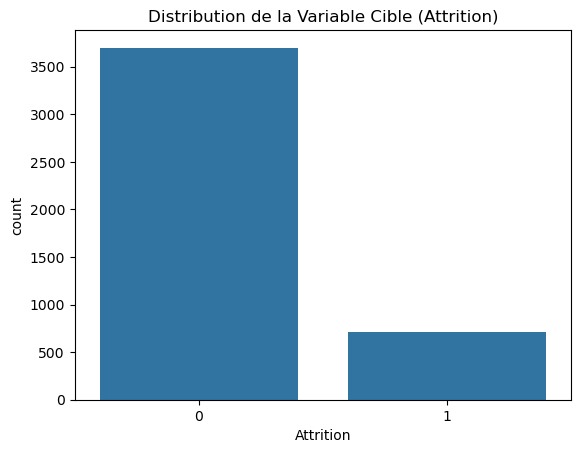

In [45]:
sns.countplot(x='Attrition', data=merged_data_prepared)
plt.title('Distribution de la Variable Cible (Attrition)')
plt.show()

## 4. Relations entre les Variables et la Cible

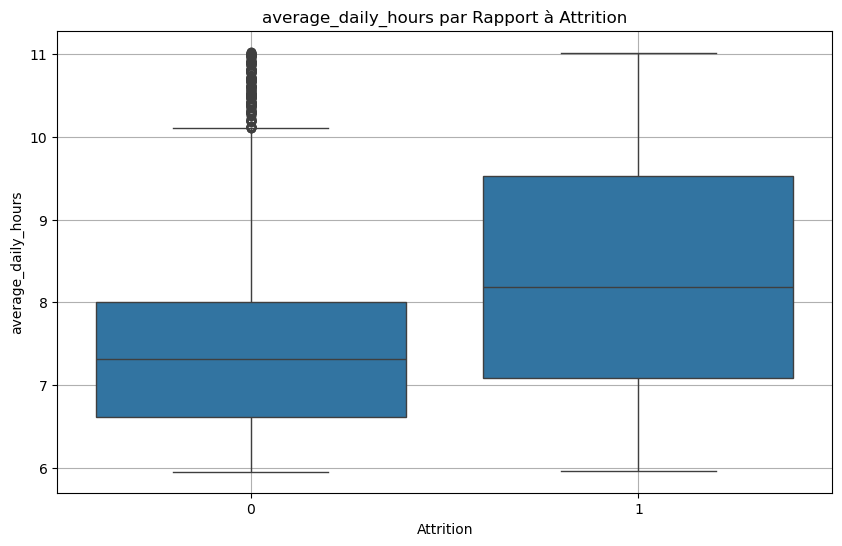

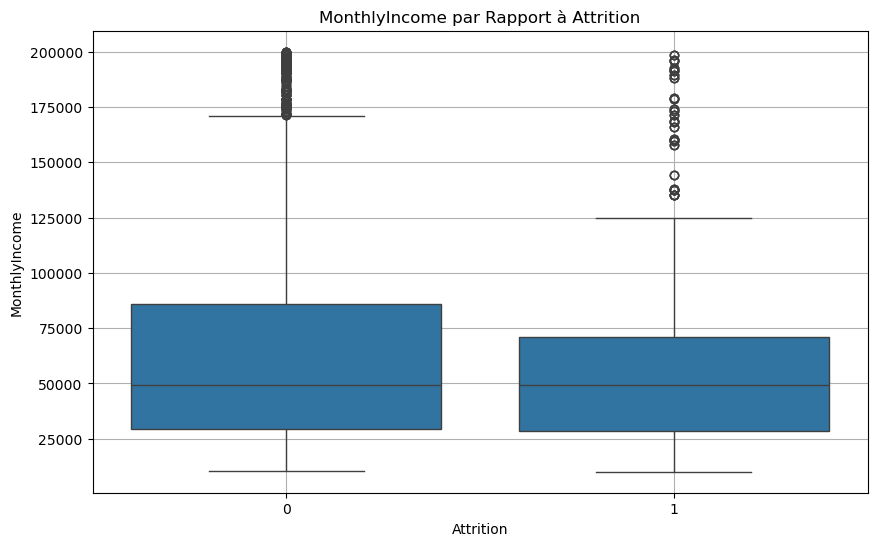

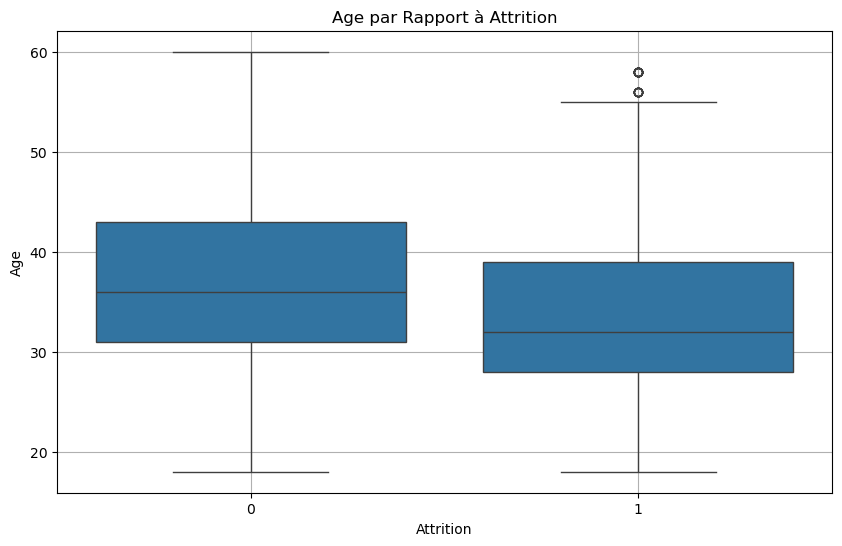

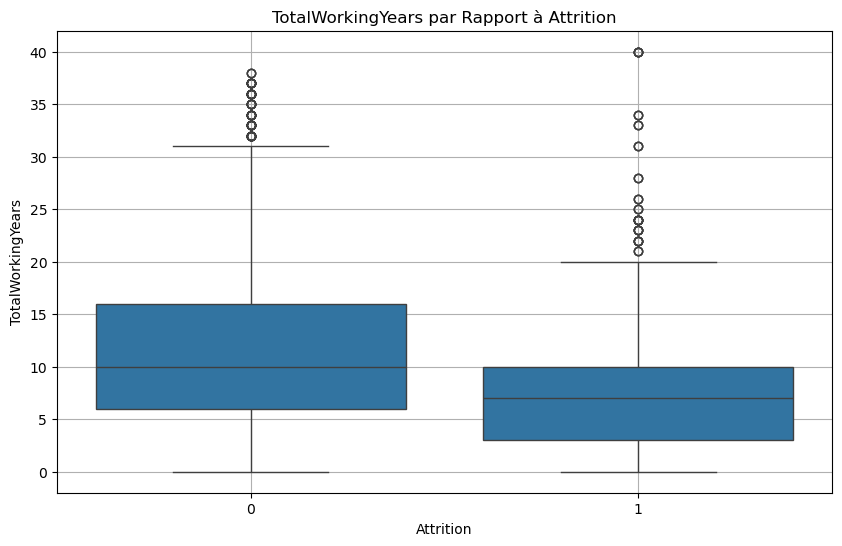

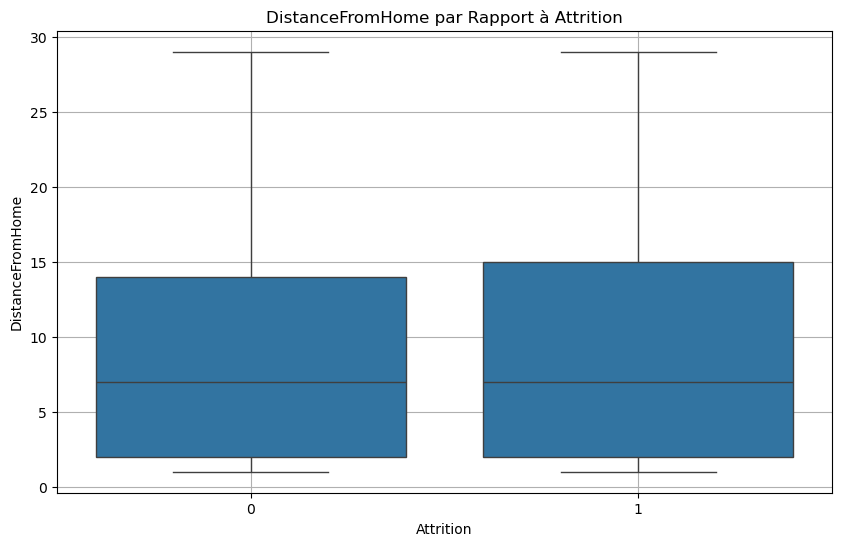

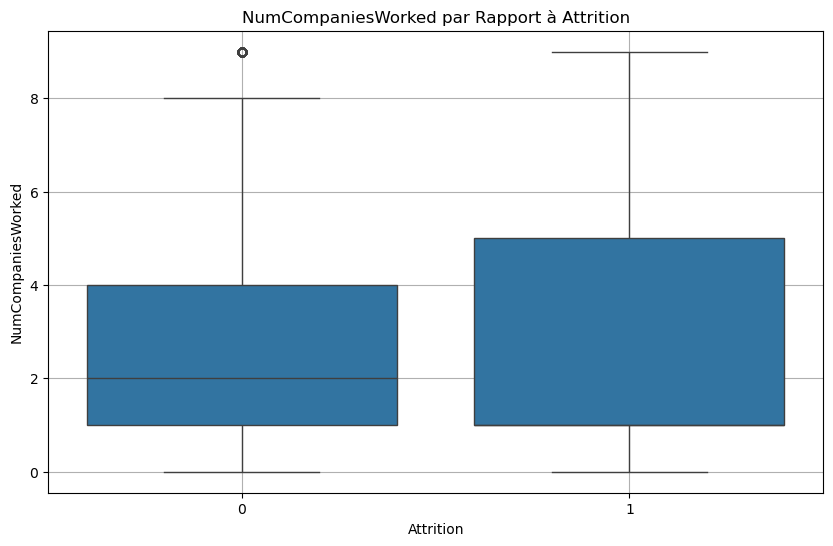

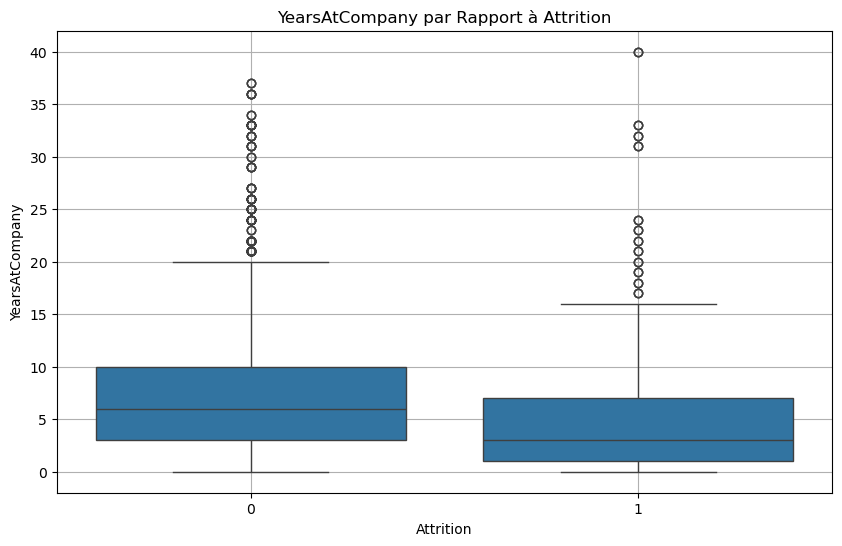

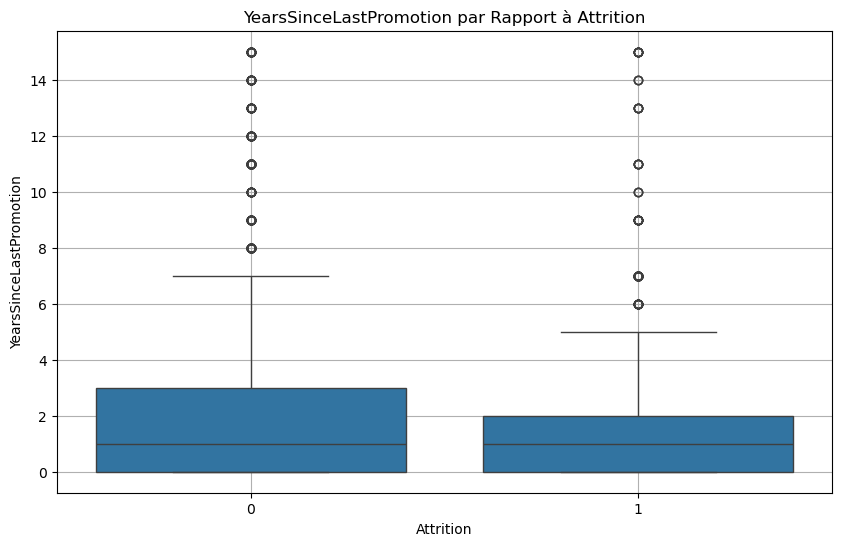

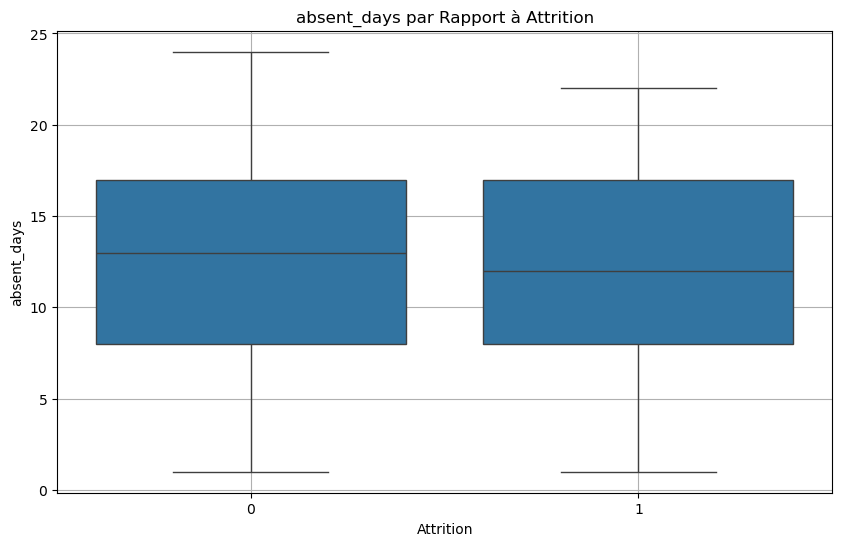

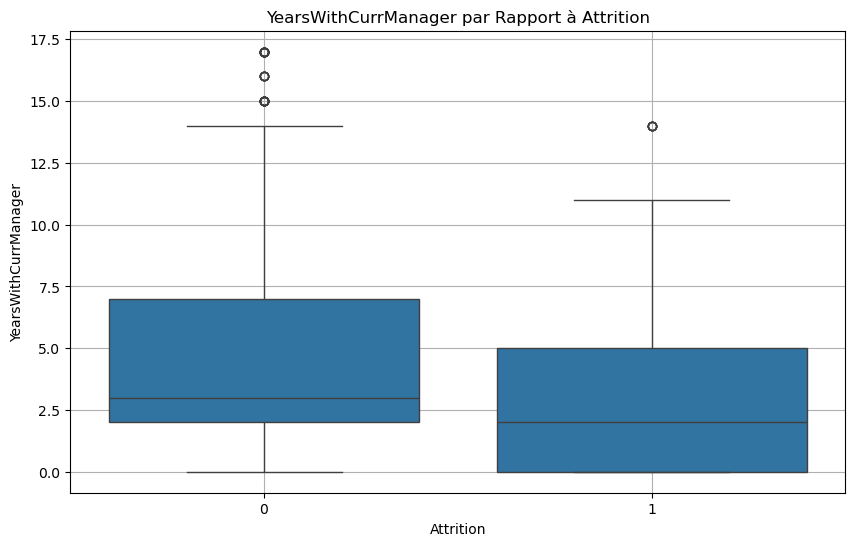

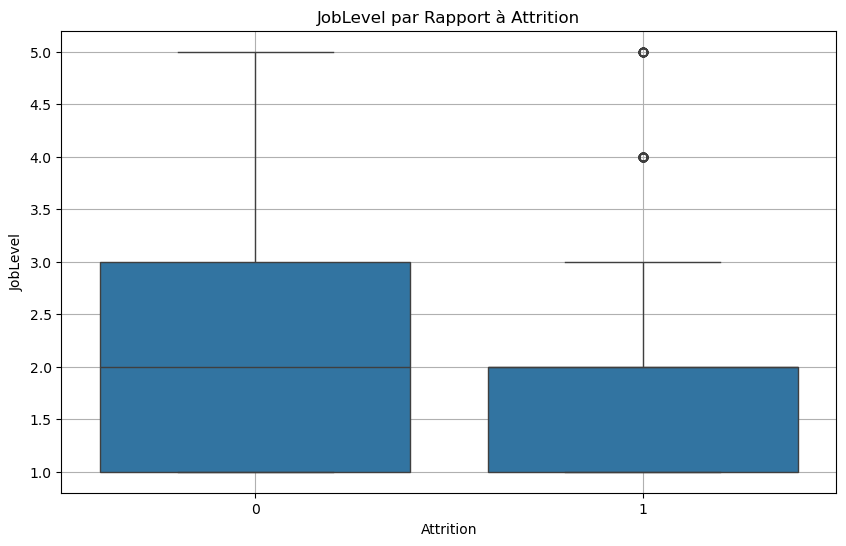

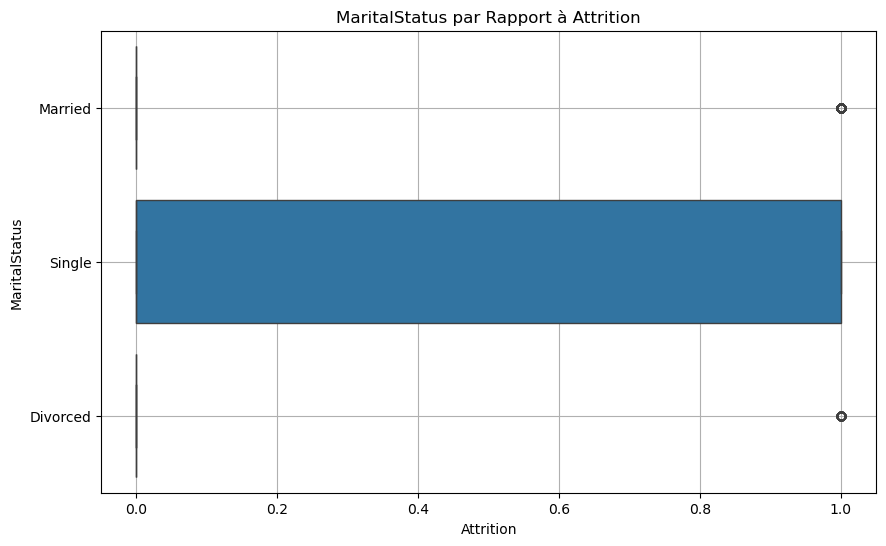

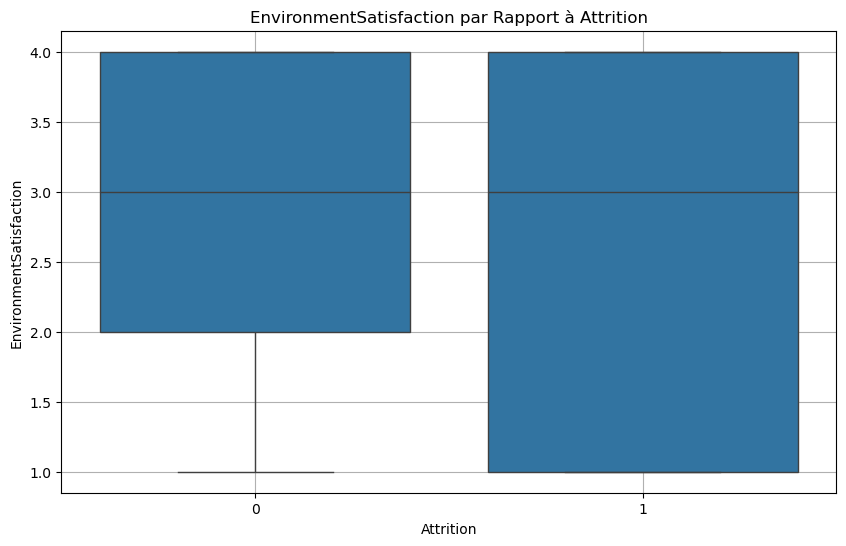

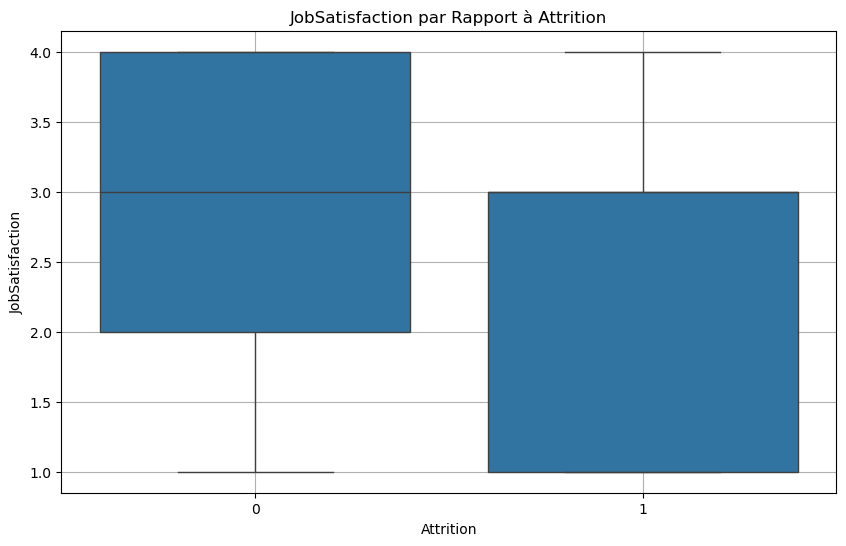

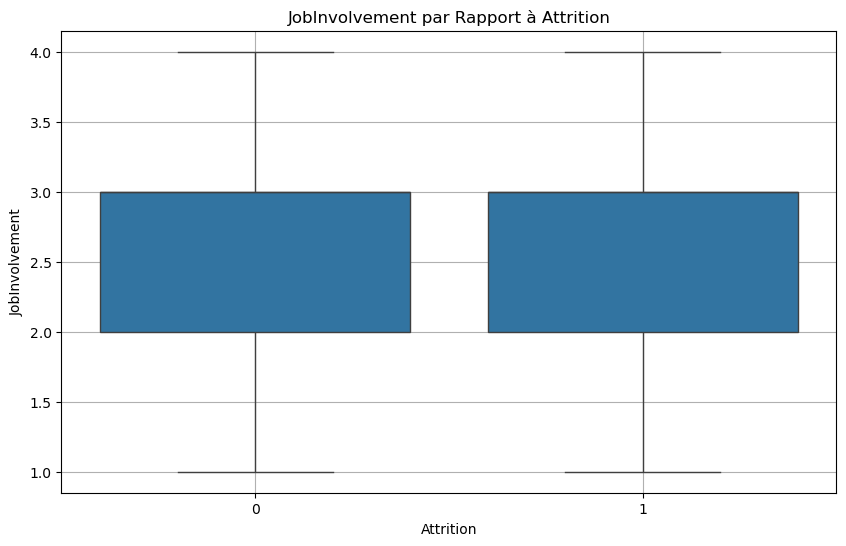

In [47]:
# Liste des colonnes numériques
numerical_columns = ['average_daily_hours','MonthlyIncome', 'Age', 'TotalWorkingYears', 'DistanceFromHome', 
                     'NumCompaniesWorked', 
                     'YearsAtCompany', 'YearsSinceLastPromotion', 
                      'absent_days', 'YearsWithCurrManager']

# Liste des colonnes catégorielles
categorical_columns = ['JobLevel', 'MaritalStatus', 
                       'EnvironmentSatisfaction', 'JobSatisfaction', 
                       'JobInvolvement']

# Boxplots pour les colonnes numériques
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition', y=column, data=merged_data)
    plt.title(f'{column} par Rapport à Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(column)
    plt.grid(True)  
    plt.show()

# Boxplots pour les colonnes catégorielles
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition', y=column, data=merged_data)
    plt.title(f'{column} par Rapport à Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(column)
    plt.grid(True)  
    plt.show()

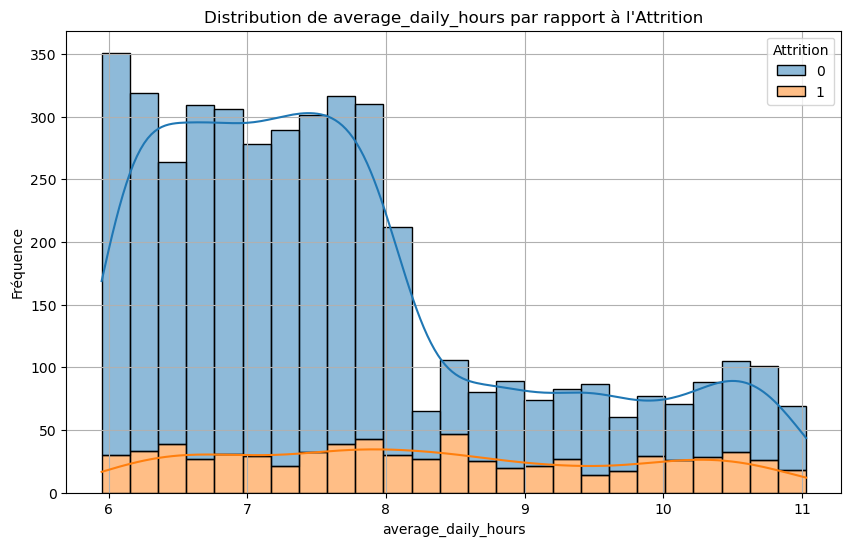

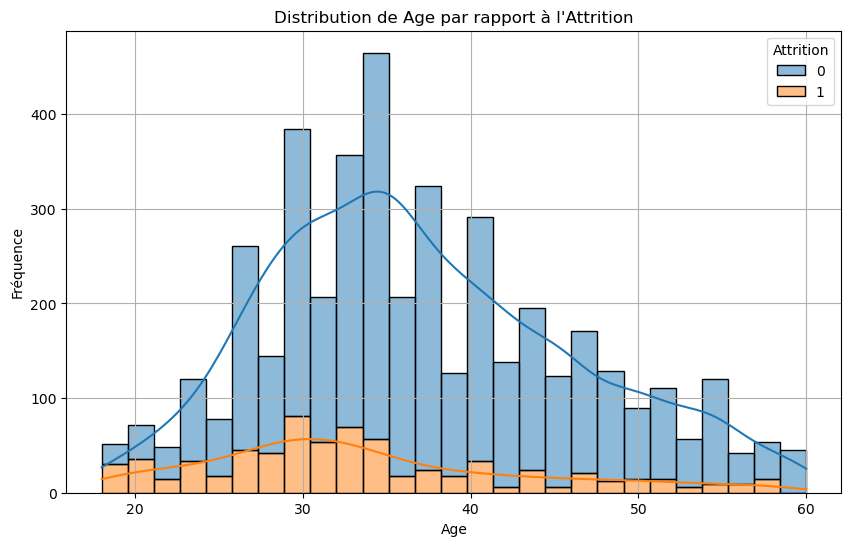

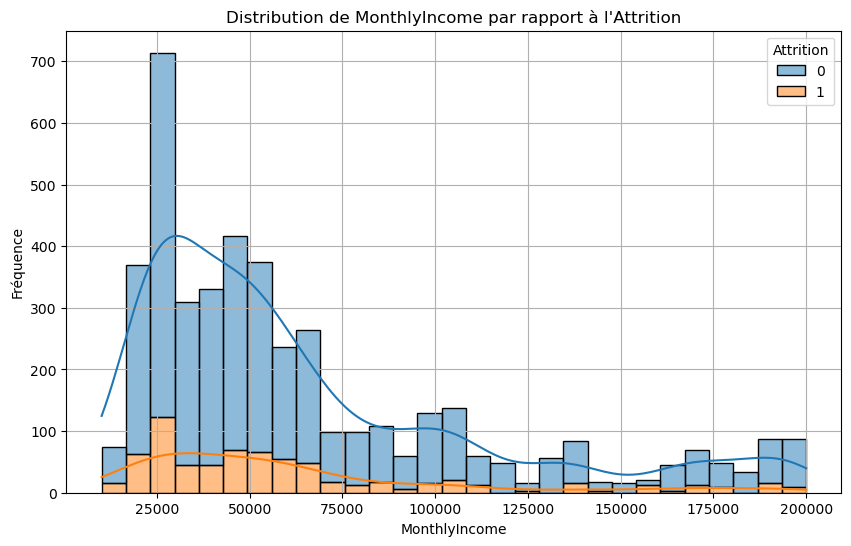

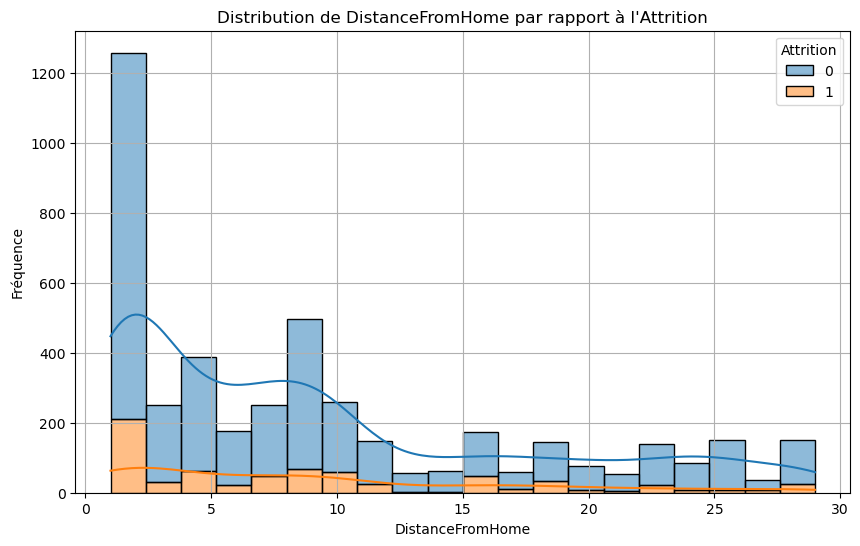

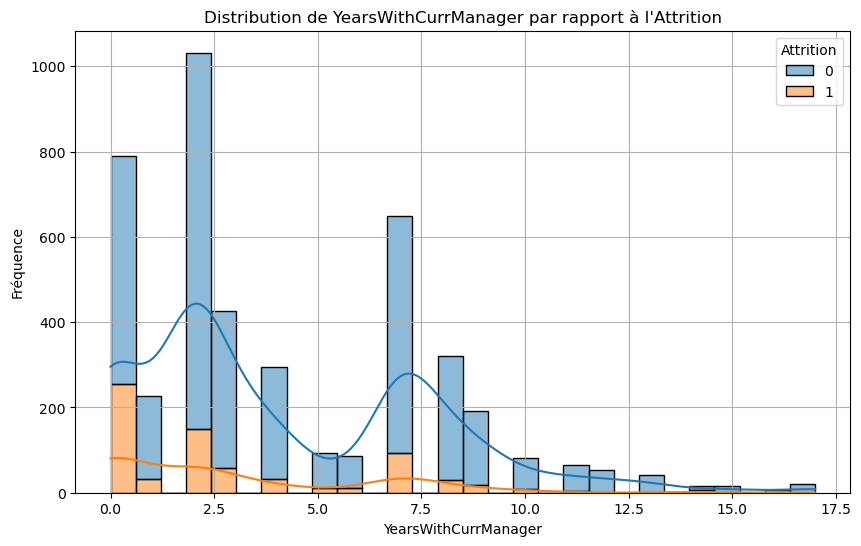

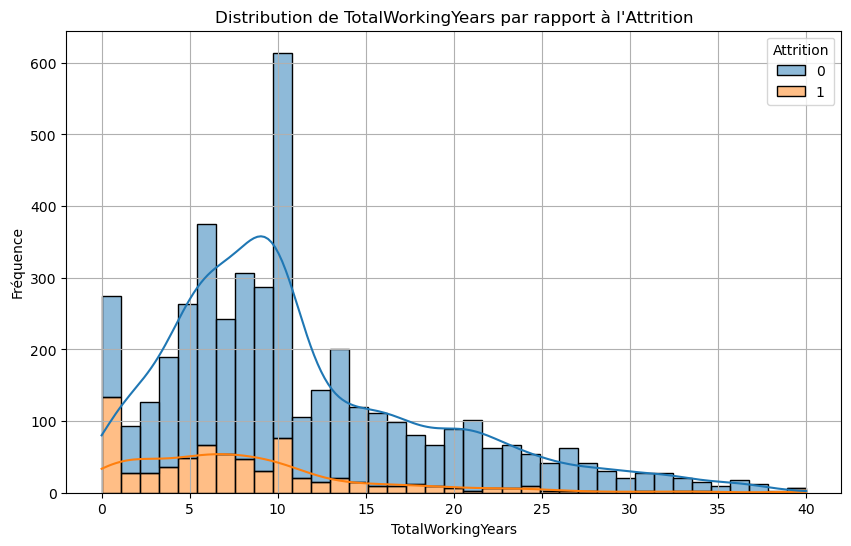

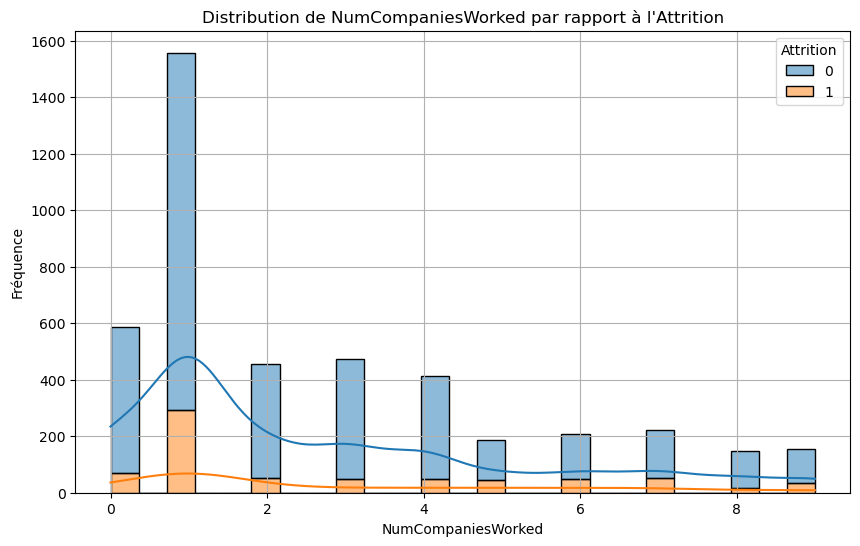

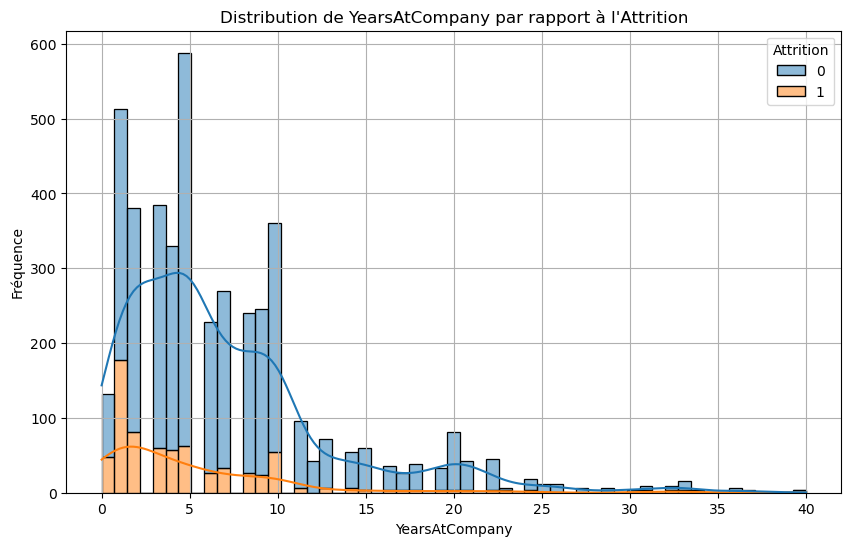

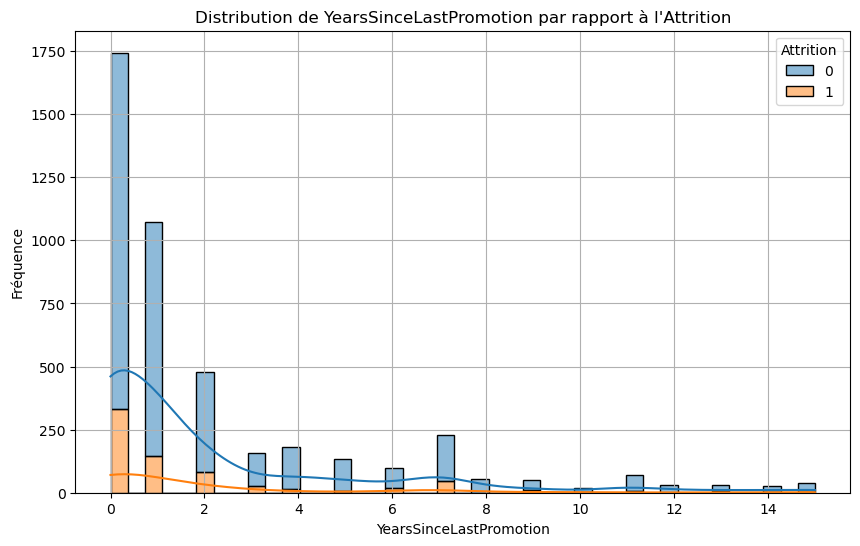

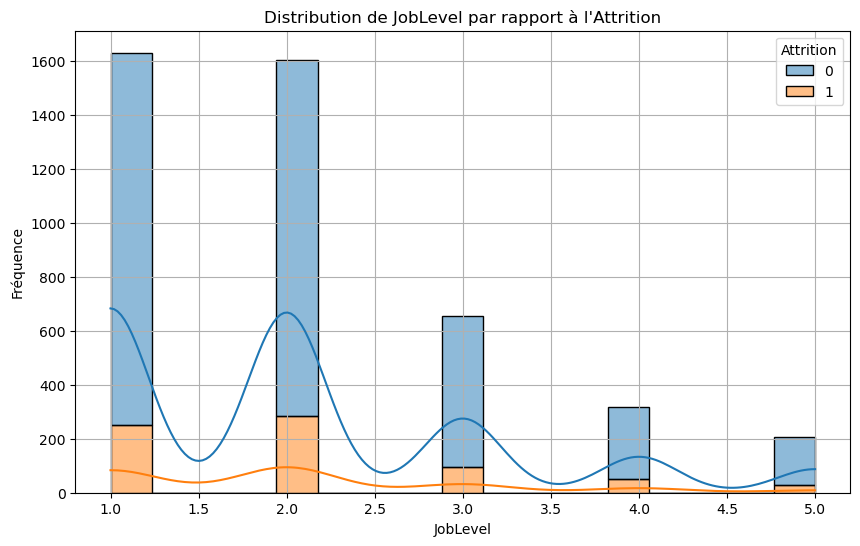

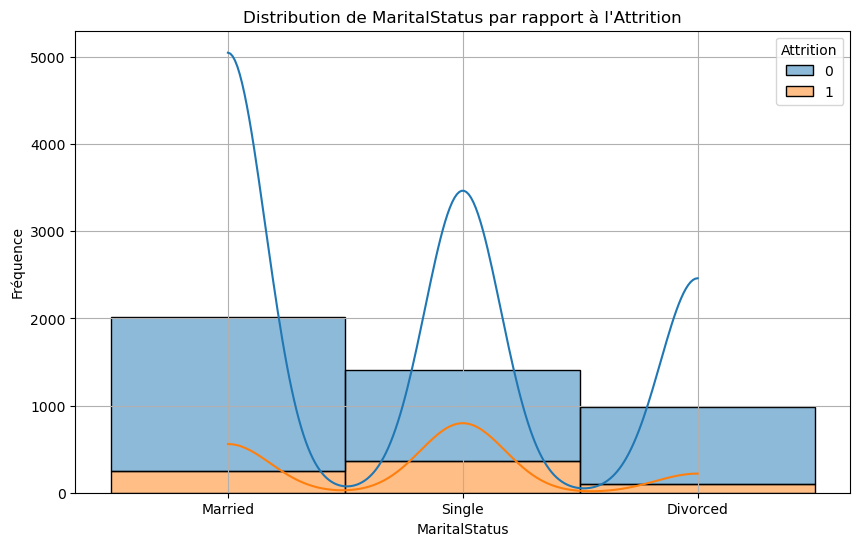

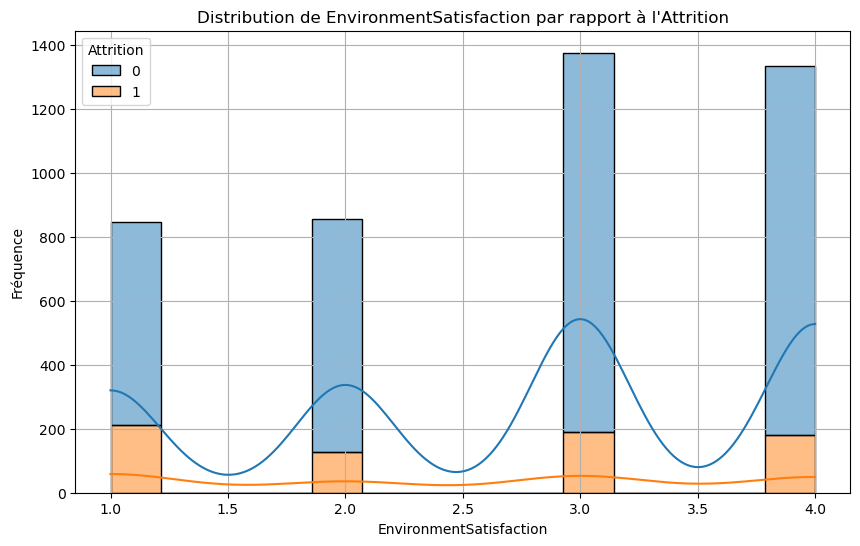

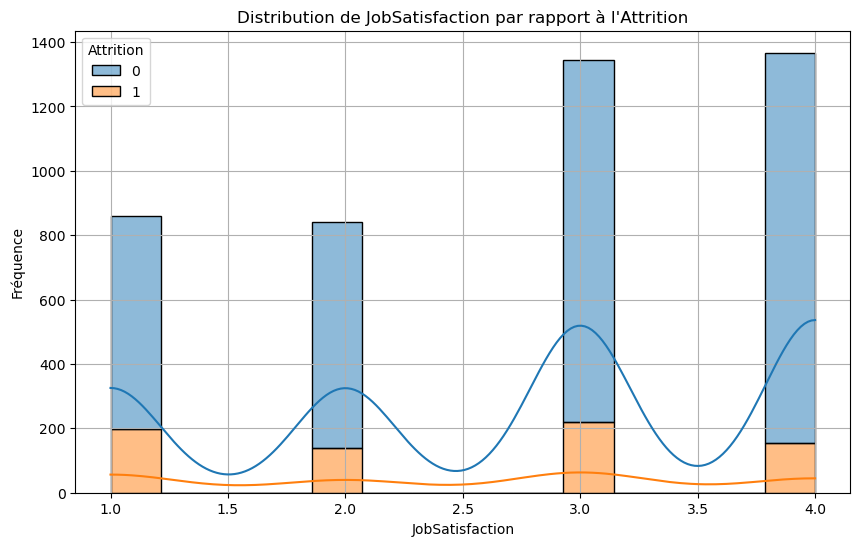

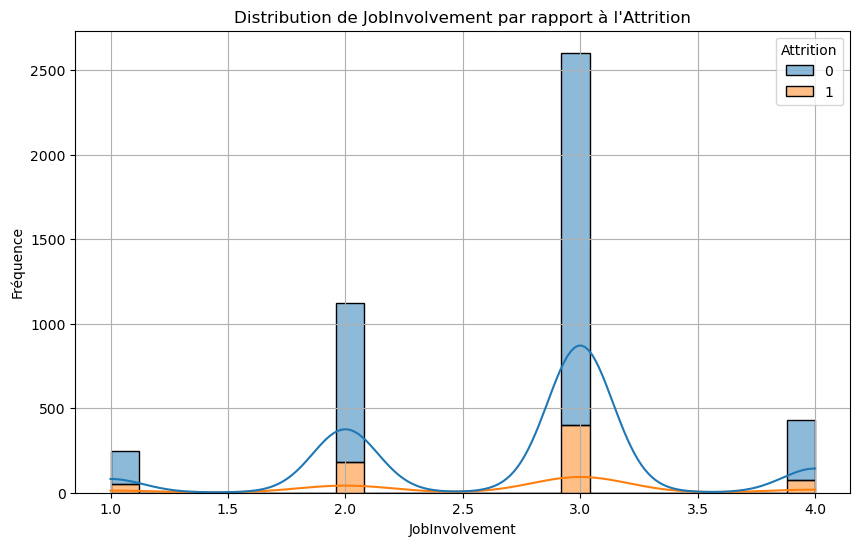

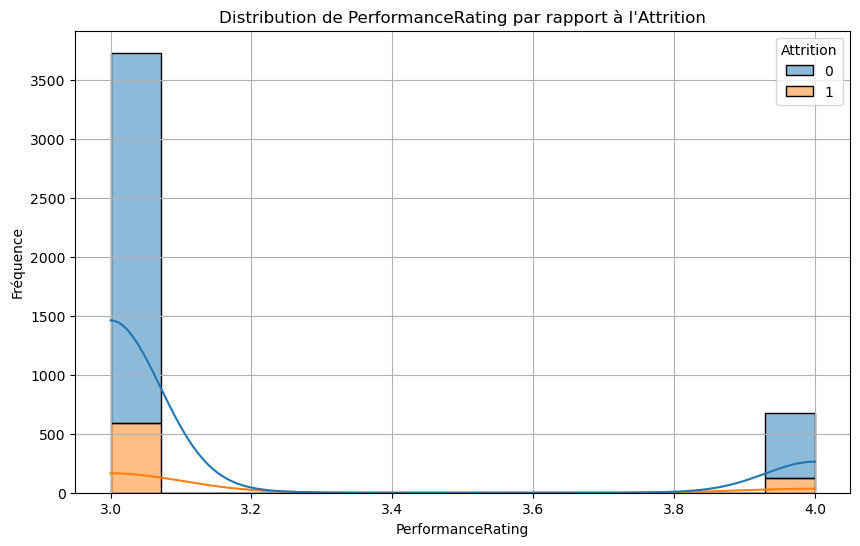

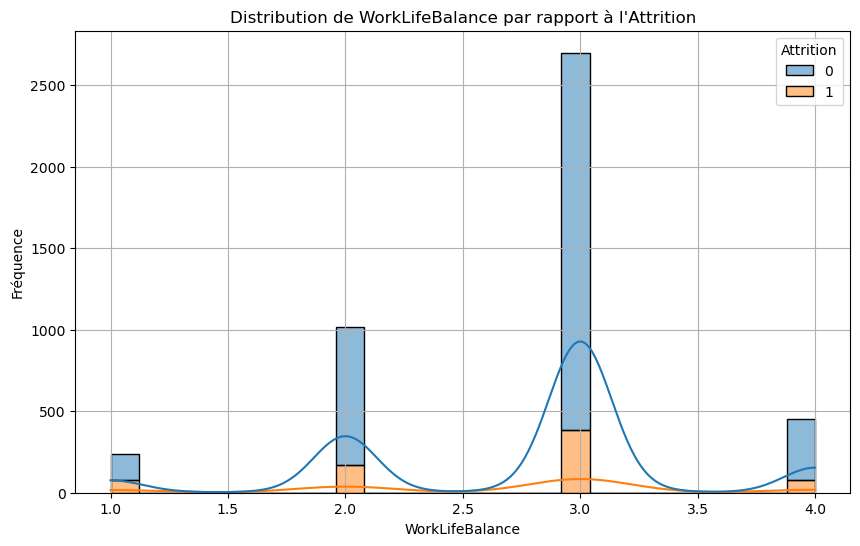

In [48]:
for column in [ 'average_daily_hours', 'Age', 'MonthlyIncome', 'DistanceFromHome', 
                 'YearsWithCurrManager', 'TotalWorkingYears', 'NumCompaniesWorked',
                 'YearsAtCompany', 'YearsSinceLastPromotion', 
                 'JobLevel', 'MaritalStatus', 
                 'EnvironmentSatisfaction', 'JobSatisfaction', 
                 'JobInvolvement', 'PerformanceRating', 'WorkLifeBalance' ]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_data, x=column, hue='Attrition', multiple='stack', kde=True)
    plt.title(f'Distribution de {column} par rapport à l\'Attrition')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.grid(True)  # Ajout d'une grille
    plt.show()

#  Application des modèles

## 0.Préparation des données d'apprentissage et de test

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Régerssion Logistique

Matrice de Confusion (Régression Logistique) :
 [[717  24]
 [105  36]]
Rapport de Classification (Régression Logistique) :
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       741
           1       0.60      0.26      0.36       141

    accuracy                           0.85       882
   macro avg       0.74      0.61      0.64       882
weighted avg       0.83      0.85      0.83       882

AUC-ROC (Régression Logistique) :
 0.6114652424842795


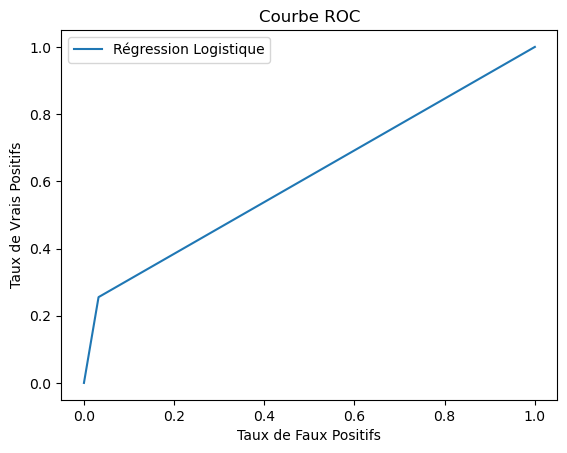

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Initialisation et entraînement du modèle


log_reg = LogisticRegression()


log_reg.fit(X_train, y_train)

# Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# Matrice de confusion
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique) :\n", conf_matrix_log_reg)

# Rapport de classification
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Rapport de Classification (Régression Logistique) :\n", class_report_log_reg)

# AUC-ROC
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
print("AUC-ROC (Régression Logistique) :\n", roc_auc_log_reg)

# Courbe ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_log_reg)
plt.plot(fpr_log_reg, tpr_log_reg, label="Régression Logistique")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### compte rendu des resultats de la regression logistique
Le modèle Régression Logistique présente une précision globale de 85 %. D'après la matrice de confusion, 717 instances de la classe 0 (non-attrition) ont été correctement classées, et 24 ont été mal classées comme 1 (attrition). Pour la classe 1, 36 instances ont été correctement identifiées, tandis que 105 ont été mal classées comme 0.

Le rapport de classification montre une précision de 87 % pour la classe 0, mais une précision de 60 % pour la classe 1, indiquant une capacité modérée à prédire l'attrition. Cependant, le rappel pour la classe 1 est faible (26 %), ce qui signifie que de nombreux cas d'attrition ont été manqués. Le f1-score pour la classe 1 est également bas (36 %), soulignant une mauvaise performance dans la détection de l'attrition.

Le score AUC-ROC de 0.61 indique que le modèle a une capacité limitée à discriminer entre les classes. En résumé, bien que la régression logistique soit efficace pour prédire les non-attritions, elle rencontre des difficultés pour identifier correctement les cas d'attrition.

C:\Users\khird\AppData\Local\Temp\ipykernel_2000\1978176066.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_log_reg_df, palette='viridis')


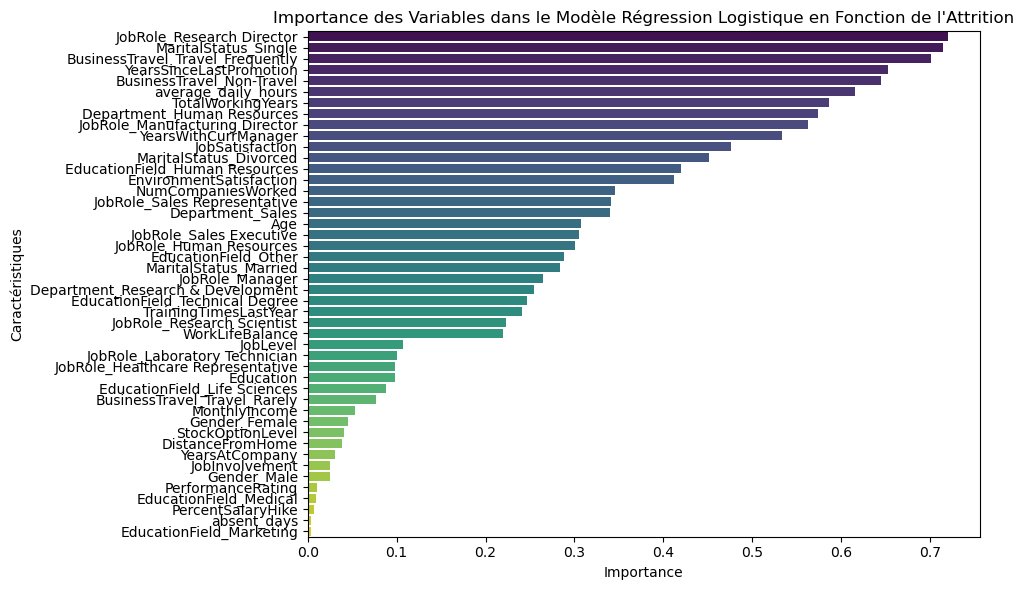

In [55]:
#Obtenir les coefficients du modèle Régression Logistique
coef_log_reg = log_reg.coef_.flatten()

# Créer un DataFrame pour l'affichage
importance_log_reg_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coef_log_reg)  # Utilisation de l'abs pour avoir la magnitude des coefficients
})

# Trier les caractéristiques par ordre décroissant de l'importance
importance_log_reg_df = importance_log_reg_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_log_reg_df, palette='viridis')
plt.title('Importance des Variables dans le Modèle Régression Logistique en Fonction de l\'Attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

### Hyper Parametre du model regression logistique

In [57]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
from sklearn.model_selection import ParameterGrid

# Manually handle solver and penalty compatibility
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced'], 'l1_ratio': [0.5]},  # l1_ratio for elasticnet
    {'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2', None], 'C': [0.01, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']},
]

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,  # Pass the list of dictionaries directly
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1,
)


# Ajuster sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Meilleur modèle
best_model = grid_search.best_estimator_

y_pred_prob = best_model.predict_proba(X_test)[:, 1]
# Évaluer sur les données de test
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("AUC-ROC (Régression Logistique) avant optimisation :", roc_auc_log_reg)
print("AUC-ROC après optimisation :", auc_roc)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Meilleurs paramètres : {'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
AUC-ROC (Régression Logistique) avant optimisation : 0.6114652424842795
AUC-ROC après optimisation : 0.7717192599611412


## 2.Perceptron

Matrice de Confusion (Perceptron) :
 [[673  68]
 [ 97  44]]
Rapport de Classification (Perceptron) :
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       741
           1       0.39      0.31      0.35       141

    accuracy                           0.81       882
   macro avg       0.63      0.61      0.62       882
weighted avg       0.80      0.81      0.80       882

AUC-ROC (Perceptron) :
 0.6101444281735435


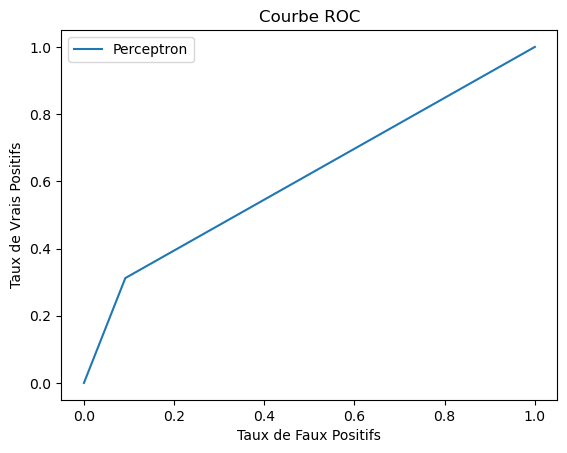

In [59]:
from sklearn.linear_model import Perceptron

# Initialisation et entraînement du modèle


perceptron = Perceptron()


perceptron.fit(X_train, y_train)


# Prédictions
y_pred_perceptron = perceptron.predict(X_test)

# Matrice de confusion
conf_matrix_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Matrice de Confusion (Perceptron) :\n", conf_matrix_perceptron)

# Rapport de classification
class_report_perceptron = classification_report(y_test, y_pred_perceptron)
print("Rapport de Classification (Perceptron) :\n", class_report_perceptron)

# AUC-ROC
roc_auc_perceptron = roc_auc_score(y_test, y_pred_perceptron)
print("AUC-ROC (Perceptron) :\n", roc_auc_perceptron)

# Courbe ROC
fpr_perceptron, tpr_perceptron, thresholds_perceptron = roc_curve(y_test, y_pred_perceptron)
plt.plot(fpr_perceptron, tpr_perceptron, label="Perceptron")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### compte rendu des resultats du Perceptron
Le modèle Perceptron affiche une précision globale de 81 %. La matrice de confusion montre que 673 instances de la classe 0 (non-attrition) ont été correctement classées, tandis que 68 ont été mal classées comme 1 (attrition). De même, 44 instances de la classe 1 ont été correctement identifiées, mais 97 ont été classées à tort dans la classe 0.

Le rapport de classification révèle une précision de 87 % pour la classe 0, mais une faible précision de 39 % pour la classe 1, ce qui indique que le modèle a des difficultés à identifier correctement les cas d'attrition. Le rappel pour la classe 1 est de 31 %, ce qui montre une tendance à manquer de nombreux cas d'attrition. Le f1-score pour la classe 1 est particulièrement bas (35 %).

Le score AUC-ROC de 0.61 indique une performance assez modeste du modèle en termes de discrimination entre les classes. En résumé, bien que le modèle affiche une précision acceptable pour la classe 0, il présente des difficultés pour prédire correctement les cas d'attrition.

C:\Users\khird\AppData\Local\Temp\ipykernel_2000\3306456613.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_perceptron_df, palette='viridis')


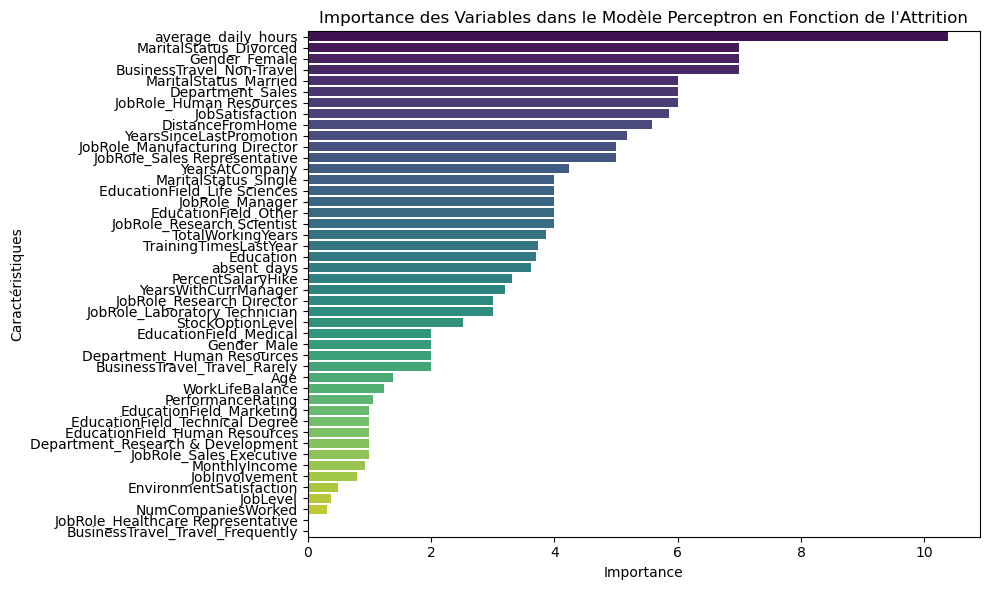

In [61]:
# Obtenir les coefficients du modèle Perceptron
coef_perceptron = perceptron.coef_.flatten()

# Créer un DataFrame pour l'affichage
importance_perceptron_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coef_perceptron)  # Utilisation de l'abs pour avoir la magnitude des coefficients
})

# Trier les caractéristiques par ordre décroissant de l'importance
importance_perceptron_df = importance_perceptron_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_perceptron_df, palette='viridis')
plt.title('Importance des Variables dans le Modèle Perceptron en Fonction de l\'Attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

### Hyper Parametre du model perceptron

In [63]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

# Définir la grille de paramètres
'''param_grid = {
    'penalty': [None, 'l2', 'l1'],     # Pas de 'elasticnet'
    'alpha': [0.0001, 0.001, 0.01],   # Réduit les valeurs possibles
    'max_iter': [1000, 2000],         # Valeurs raisonnables
    'tol': [1e-4, 1e-3],              # Évite les tolérances trop larges
    'eta0': [0.1, 0.01],              # Valeurs modérées pour le taux d'apprentissage
    'shuffle': [True],                # Évite les options non nécessaires
    'class_weight': [None, 'balanced']
}'''


# Initialiser GridSearchCV
grid_search = GridSearchCV(
    perceptron,
    param_grid={
        'penalty': [None, 'l2', 'l1'],
        'alpha': [0.0001, 0.001, 0.01],
        'max_iter': [1000, 2000],
        'tol': [1e-4, 1e-3],
        'eta0': [0.1, 0.01],
        'shuffle': [True],
        'class_weight': [None, 'balanced']
    },
    scoring='roc_auc',  # Simpler metric for Perceptron
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)


# Résultats
best_model = grid_search.best_estimator_  # Meilleur modèle
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("AUC-ROC (Perceptron) avant optimisation :", roc_auc_perceptron)
print("Meilleur score (AUC-ROC) apres optimisation :", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Meilleurs hyperparamètres : {'alpha': 0.001, 'class_weight': None, 'eta0': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'shuffle': True, 'tol': 0.001}
AUC-ROC (Perceptron) avant optimisation : 0.6101444281735435
Meilleur score (AUC-ROC) apres optimisation : 0.7389201860489931


## 3.Support Vector Machine (SVM)

Matrice de Confusion (SVM) :
 [[738   3]
 [ 68  73]]
Rapport de Classification (SVM) :
               precision    recall  f1-score   support

           0       0.92      1.00      0.95       741
           1       0.96      0.52      0.67       141

    accuracy                           0.92       882
   macro avg       0.94      0.76      0.81       882
weighted avg       0.92      0.92      0.91       882

AUC-ROC (SVM) :
 0.7568409567289746


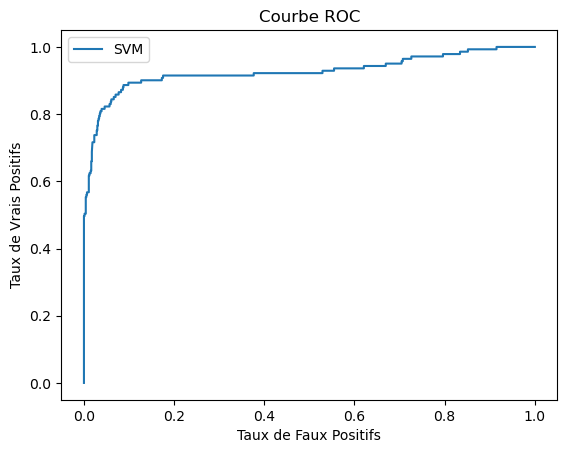

In [65]:
from sklearn.svm import SVC

# Initialisation et entraînement du modèle
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Prédictions
y_pred_svm = svm.predict(X_test)

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Matrice de Confusion (SVM) :\n", conf_matrix_svm)

# Rapport de classification
class_report_svm = classification_report(y_test, y_pred_svm)
print("Rapport de Classification (SVM) :\n", class_report_svm)

# AUC-ROC
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("AUC-ROC (SVM) :\n", roc_auc_svm)

# Courbe ROC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### compte rendu des resultats du SVM
Le modèle SVM a obtenu une précision globale de 92 %, indiquant une bonne performance générale. La matrice de confusion montre que le modèle classifie correctement 738 instances de la classe 0 (non-attrition) sur 741 (rappel de 100 %) et 73 instances de la classe 1 (attrition) sur 141 (rappel de 52 %). Cela traduit une forte capacité à prédire la classe majoritaire (0), mais une difficulté à capturer toutes les instances de la classe minoritaire (1).

Le rapport de classification confirme cette tendance avec une précision de 96 % pour la classe 1, mais un rappel plus faible à 52 %, ce qui entraîne un déséquilibre entre les métriques. Quant à la classe 0, elle est presque parfaitement prédite avec un f1-score élevé de 95 %.

Le score AUC-ROC de 0.76 indique que le modèle est capable de distinguer correctement entre les deux classes, bien que des améliorations soient possibles pour mieux identifier les instances de la classe 1.

C:\Users\khird\AppData\Local\Temp\ipykernel_2000\647048872.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_svm_df, palette='viridis')


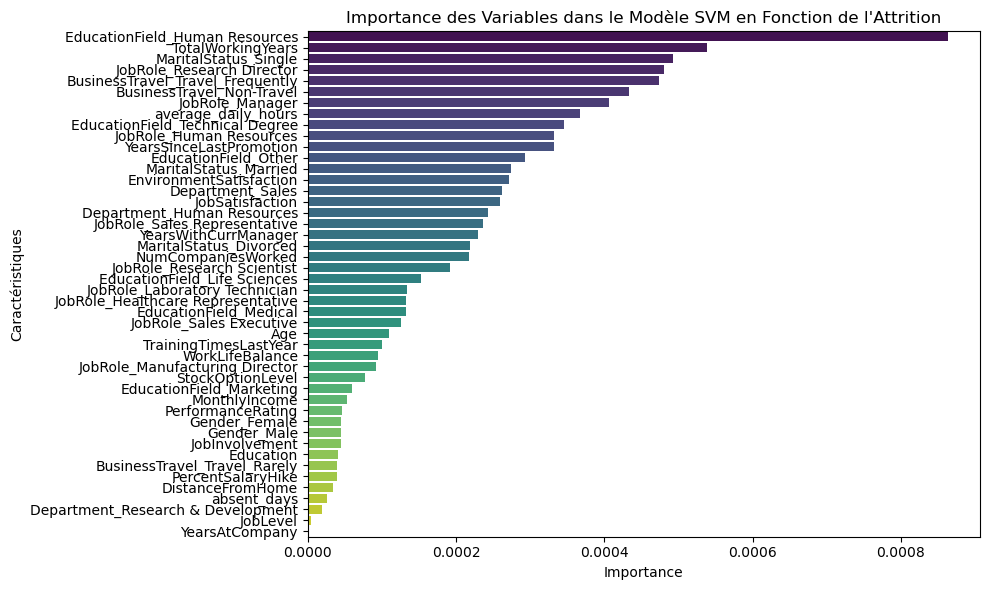

In [67]:
# Initialisation du modèle SVM avec un noyau linéaire
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)

# Obtenir les coefficients du modèle linéaire SVM
coef_svm = svm_linear.coef_.flatten()

# Créer un DataFrame pour l'affichage
importance_svm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(coef_svm)  # Utilisation de l'abs pour avoir la magnitude des coefficients
})

# Trier les caractéristiques par ordre décroissant de l'importance
importance_svm_df = importance_svm_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_svm_df, palette='viridis')
plt.title('Importance des Variables dans le Modèle SVM en Fonction de l\'Attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

## 4. Naive Bayès

Matrice de Confusion (Naive Bayes) :
 [[639 102]
 [ 85  56]]
Rapport de Classification (Naive Bayes) :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       741
           1       0.35      0.40      0.37       141

    accuracy                           0.79       882
   macro avg       0.62      0.63      0.62       882
weighted avg       0.80      0.79      0.79       882

AUC-ROC (Naive Bayes) :
 0.6297556493525139


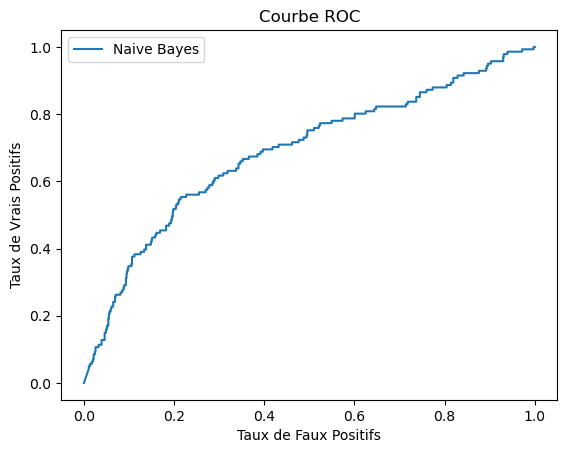

In [69]:
from sklearn.naive_bayes import GaussianNB

# Initialisation et entraînement du modèle
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb.predict(X_test)

# Matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Matrice de Confusion (Naive Bayes) :\n", conf_matrix_nb)

# Rapport de classification
class_report_nb = classification_report(y_test, y_pred_nb)
print("Rapport de Classification (Naive Bayes) :\n", class_report_nb)

# AUC-ROC
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)
print("AUC-ROC (Naive Bayes) :\n", roc_auc_nb)

# Courbe ROC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.plot(fpr_nb, tpr_nb, label="Naive Bayes")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### compte rendu des resultats du Naive Bayès 
Le modèle Naive Bayes a obtenu une précision globale de 79 %, ce qui est inférieur aux autres modèles testés jusqu’à présent. La matrice de confusion révèle que 639 instances de la classe 0 (non-attrition) sur 741 ont été correctement classifiées (rappel de 86 %), tandis que pour la classe 1 (attrition), seulement 56 instances sur 141 ont été correctement identifiées (rappel de 40 %).

Le rapport de classification met en évidence un déséquilibre notable entre les classes. La classe majoritaire (0) bénéficie d’une précision et d’un f1-score élevés (respectivement 88 % et 87 %), tandis que la classe minoritaire (1) présente une précision faible de 35 % et un f1-score de 37 %, indiquant des difficultés du modèle à bien prédire cette classe.

Le score AUC-ROC de 0.63 indique une performance modérée en termes de discrimination entre les deux classes. Cela suggère que le modèle Naive Bayes peine à bien capturer les caractéristiques permettant de distinguer les individus sujets à l’attrition.

C:\Users\khird\AppData\Local\Temp\ipykernel_2000\4003144971.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=std_devs_df, palette='viridis')


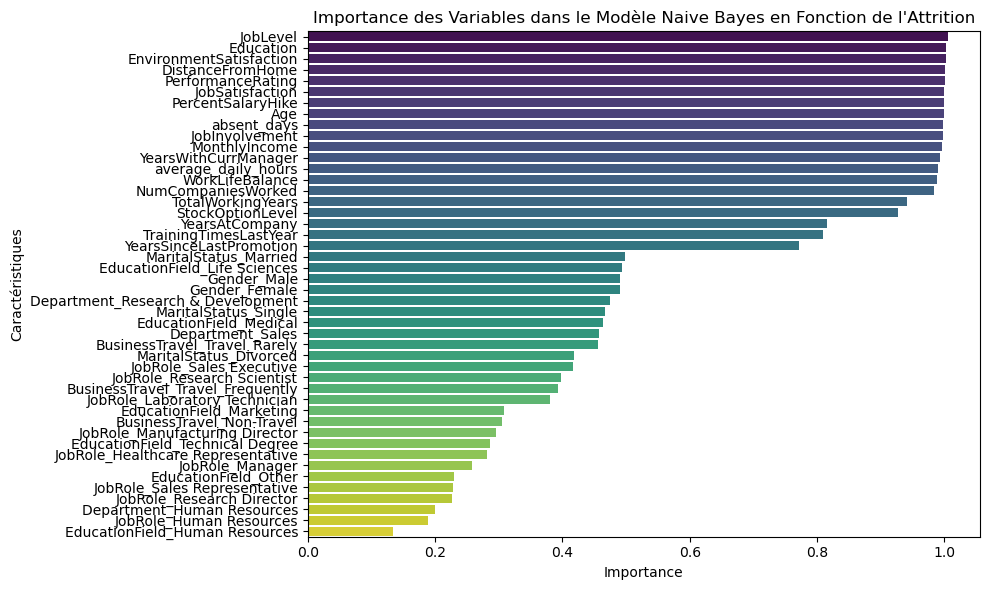

In [71]:
# Calcul des écart-types des distributions gaussiennes (utilisées pour Naive Bayes)
std_devs = np.std(X_train, axis=0)

# Créer un DataFrame pour l'affichage
std_devs_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': std_devs
})

# Trier les caractéristiques par ordre décroissant de l'importance
std_devs_df = std_devs_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=std_devs_df, palette='viridis')
plt.title('Importance des Variables dans le Modèle Naive Bayes en Fonction de l\'Attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

### Hyper Parametre du model Naive Bayes 

In [73]:
# Initialisation du modèle
gnb = GaussianNB()

# Définition de la grille de paramètres
param_grid = {
    'var_smoothing': np.logspace(-9, -1, 10)  # Explore les valeurs entre 10^-9 et 10^-1
}

# Perform grid search
grid_search = GridSearchCV(
    gnb,
    param_grid,
    scoring='roc_auc',
    cv=5,        # Validation croisée à 5 plis
    verbose=1,
    n_jobs=-1    # Utilisation de tous les cœurs disponibles
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("AUC-ROC (Naive Bayes) avant optimisation :\n", roc_auc_nb)
print("Best AUC-ROC Score apres optimisation:", grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'var_smoothing': 0.1}
AUC-ROC (Naive Bayes) avant optimisation :
 0.6297556493525139
Best AUC-ROC Score apres optimisation: 0.7788510825813791


## 5. Decision Trees

Matrice de Confusion (Decision Tree) :
 [[730  11]
 [  6 135]]
Rapport de Classification (Decision Tree) :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       741
           1       0.92      0.96      0.94       141

    accuracy                           0.98       882
   macro avg       0.96      0.97      0.96       882
weighted avg       0.98      0.98      0.98       882

AUC-ROC (Decision Tree) :
 0.9713010020960748


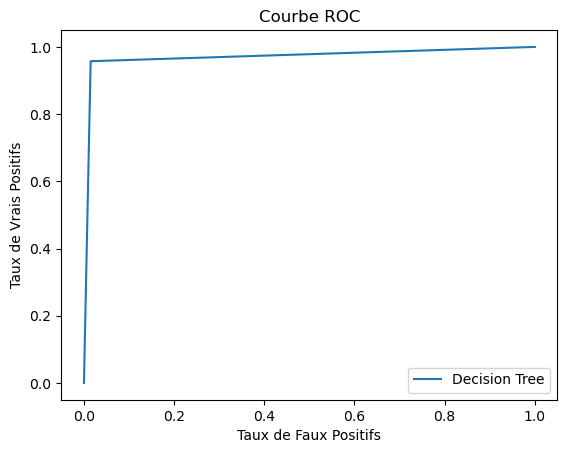

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Initialisation et entraînement du modèle
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_test)

# Matrice de confusion
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Matrice de Confusion (Decision Tree) :\n", conf_matrix_tree)

# Rapport de classification
class_report_tree = classification_report(y_test, y_pred_tree)
print("Rapport de Classification (Decision Tree) :\n", class_report_tree)

# AUC-ROC
roc_auc_tree = roc_auc_score(y_test, y_pred_tree)
print("AUC-ROC (Decision Tree) :\n", roc_auc_tree)

# Courbe ROC
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_proba_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### compte rendu des resultats du Decision Trees
Le modèle Decision Tree a obtenu une précision globale remarquable de 98 %, ce qui en fait l’un des meilleurs modèles parmi ceux testés. La matrice de confusion montre que 730 instances de la classe 0 (non-attrition) sur 741 ont été correctement classifiées (rappel de 99 %), tandis que 135 instances de la classe 1 (attrition) sur 141 ont également été bien prédites (rappel de 96 %).

Le rapport de classification confirme ces excellentes performances avec une précision de 99 % pour la classe 0 et 92 % pour la classe 1, et des f1-scores respectifs de 99 % et 94 %, soulignant une grande capacité à prédire les deux classes, y compris la classe minoritaire.

Enfin, le score AUC-ROC de 0.97 indique une excellente capacité discriminante du modèle pour séparer les individus sujets à l’attrition de ceux qui ne le sont pas. Cela montre que le modèle Decision Tree capture efficacement les relations dans les données tout en maintenant un équilibre entre les deux classes.


C:\Users\khird\AppData\Local\Temp\ipykernel_2000\3282731408.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


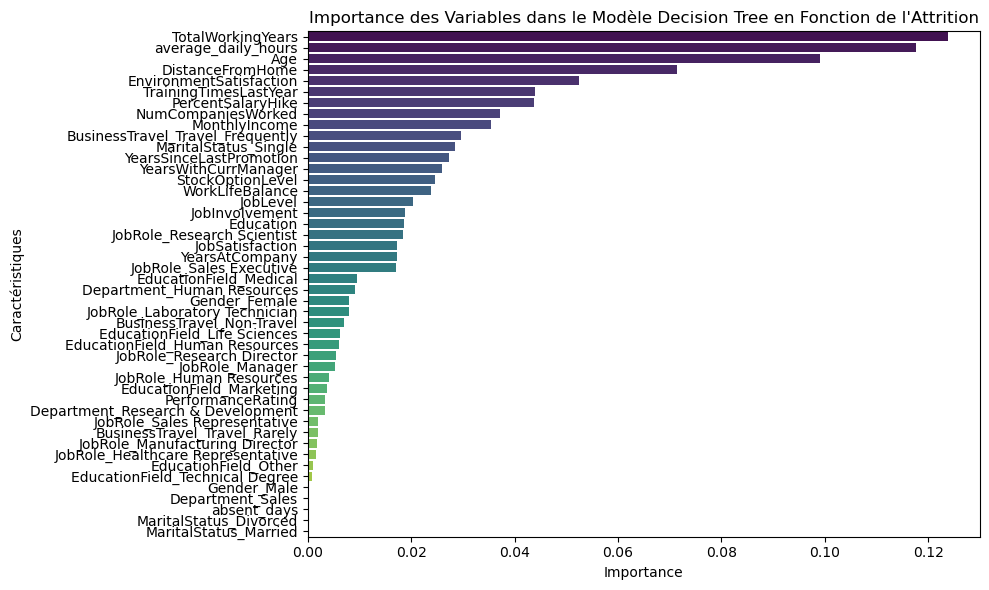

In [77]:
# Obtenir l'importance des caractéristiques du modèle Decision Tree
feature_importances = tree_model.feature_importances_

# Créer un DataFrame pour l'affichage
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Trier les caractéristiques par ordre décroissant de l'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Importance des Variables dans le Modèle Decision Tree en Fonction de l\'Attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

## 6. Random Forest

Matrice de Confusion (Random Forest) :
 [[741   0]
 [  8 133]]
Rapport de Classification (Random Forest) :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       1.00      0.94      0.97       141

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882

AUC-ROC (Random Forest) :
 0.9716312056737588


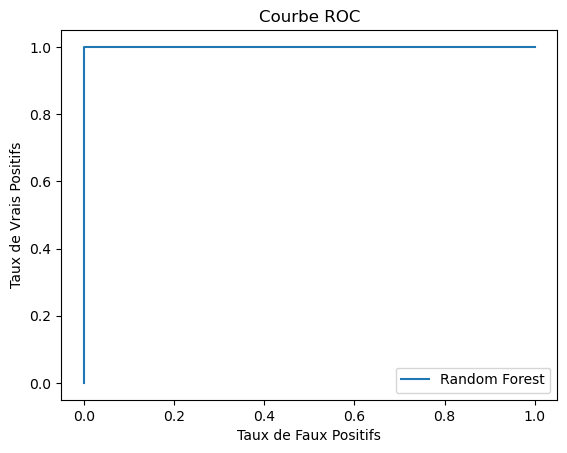

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation et entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest) :\n", conf_matrix_rf)

# Rapport de classification
class_report_rf = classification_report(y_test, y_pred_rf)
print("Rapport de Classification (Random Forest) :\n", class_report_rf)

# AUC-ROC
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC (Random Forest) :\n", roc_auc_rf)

# Courbe ROC
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.show()

### compte rendu des resultats de Random Forest
Le modèle Random Forest présente des performances exceptionnelles avec une précision globale de 99 %, ce qui en fait le modèle le plus performant jusqu’à présent. La matrice de confusion révèle que toutes les 741 instances de la classe 0 (non-attrition) ont été correctement prédites (rappel de 100 %), et 133 des 141 instances de la classe 1 (attrition) ont été correctement identifiées, avec un rappel de 94 %.

Le rapport de classification confirme ces résultats avec une précision parfaite de 99 % pour la classe 0 et de 100 % pour la classe 1, ainsi que des f1-scores respectifs de 99 % et 97 %, démontrant la capacité du modèle à équilibrer la prédiction des deux classes.

Le score AUC-ROC de 0.97 montre que le modèle possède une excellente capacité à discriminer les individus sujets à l'attrition de ceux qui ne le sont pas. Ces résultats illustrent la robustesse et l’efficacité du modèle Random Forest pour traiter des données complexes avec des classes déséquilibrées.

C:\Users\khird\AppData\Local\Temp\ipykernel_2000\2968406980.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_rf_df, palette='viridis')


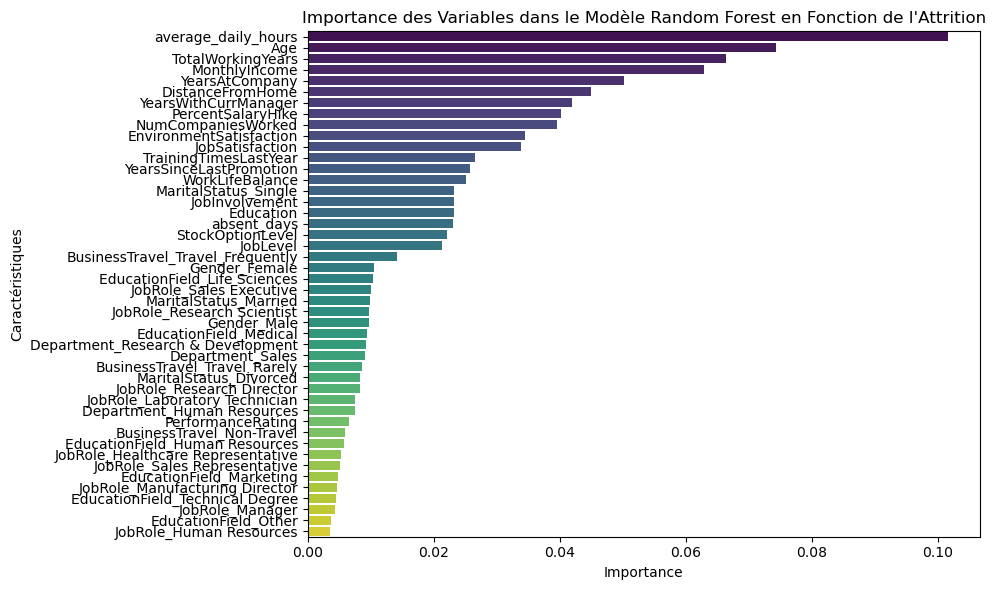

In [81]:
# Obtenir l'importance des caractéristiques du modèle Random Forest
feature_importances_rf = rf_model.feature_importances_

# Créer un DataFrame pour l'affichage
features_rf = X_train.columns
importance_rf_df = pd.DataFrame({
    'Feature': features_rf,
    'Importance': feature_importances_rf
})

# Trier les caractéristiques par ordre décroissant de l'importance
importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf_df, palette='viridis')
plt.title('Importance des Variables dans le Modèle Random Forest en Fonction de l\'Attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

## 7. GBR

Matrice de Confusion (Gradient Boosting) :
 [[741   0]
 [ 11 130]]
Rapport de Classification (Gradient Boosting) :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       741
           1       1.00      0.92      0.96       141

    accuracy                           0.99       882
   macro avg       0.99      0.96      0.98       882
weighted avg       0.99      0.99      0.99       882

AUC-ROC (Gradient Boosting) :
 0.9994257329083757


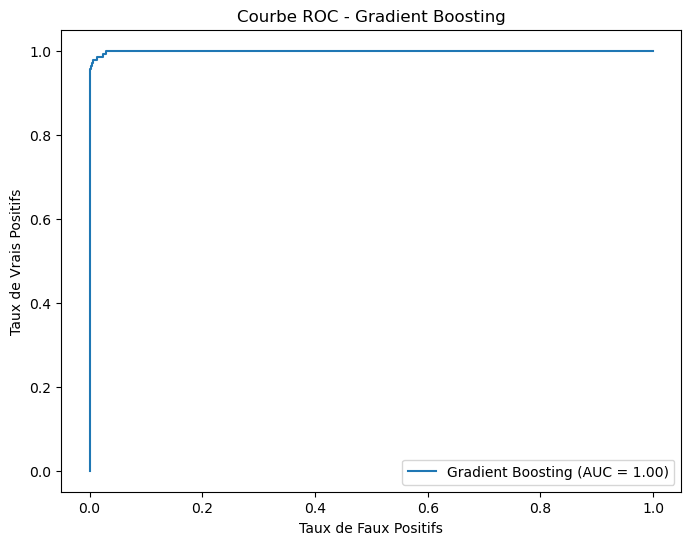

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialisation et entraînement du modèle Gradient Boosting
gbr_model = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Prédictions
y_pred_gbr = gbr_model.predict(X_test)

# Matrice de confusion
conf_matrix_gbr = confusion_matrix(y_test, y_pred_gbr)
print("Matrice de Confusion (Gradient Boosting) :\n", conf_matrix_gbr)

# Rapport de classification
class_report_gbr = classification_report(y_test, y_pred_gbr)
print("Rapport de Classification (Gradient Boosting) :\n", class_report_gbr)

# AUC-ROC
y_proba_gbr = gbr_model.predict_proba(X_test)[:, 1]
roc_auc_gbr = roc_auc_score(y_test, y_proba_gbr)
print("AUC-ROC (Gradient Boosting) :\n", roc_auc_gbr)

# Courbe ROC
fpr_gbr, tpr_gbr, thresholds_gbr = roc_curve(y_test, y_proba_gbr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbr, tpr_gbr, label="Gradient Boosting (AUC = {:.2f})".format(roc_auc_gbr))
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC - Gradient Boosting")
plt.legend(loc="best")
plt.show()

### compte rendu des resultats du Gradient Boosting
Le modèle Gradient Boosting affiche des performances remarquables avec une précision globale de 99 %. La matrice de confusion montre que les 741 instances de la classe 0 (non-attrition) ont toutes été correctement prédites (rappel de 100 %), tandis que 130 des 141 instances de la classe 1 (attrition) ont été correctement identifiées, avec un rappel de 92 %.

Le rapport de classification confirme une précision parfaite de 99 % pour la classe 0 et de 100 % pour la classe 1, avec des f1-scores de 99 % et 96 %, respectivement. Cela démontre que le modèle parvient à minimiser les erreurs tout en maintenant un excellent équilibre entre précision et rappel.

Le score AUC-ROC exceptionnel de 0.999 souligne la capacité quasi-parfaite du modèle à discriminer les deux classes. Ces résultats mettent en lumière la puissance du Gradient Boosting pour capturer des relations complexes dans les données tout en gérant efficacement les classes déséquilibrées.

C:\Users\khird\AppData\Local\Temp\ipykernel_2000\982247520.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_gbr_df, palette='viridis')


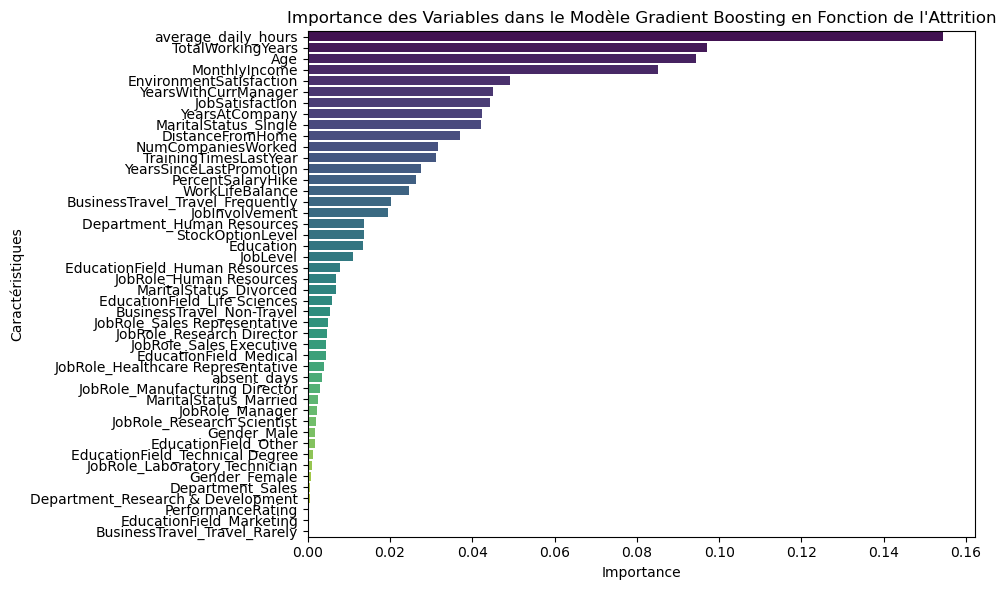

In [85]:
# Obtenir l'importance des caractéristiques du modèle Gradient Boosting
feature_importances_gbr = gbr_model.feature_importances_

# Créer un DataFrame pour l'affichage
features_gbr = X_train.columns
importance_gbr_df = pd.DataFrame({
    'Feature': features_gbr,
    'Importance': feature_importances_gbr
})

# Trier les caractéristiques par ordre décroissant de l'importance
importance_gbr_df = importance_gbr_df.sort_values(by='Importance', ascending=False)

# Tracer l'importance des caractéristiques
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_gbr_df, palette='viridis')
plt.title('Importance des Variables dans le Modèle Gradient Boosting en Fonction de l\'Attrition')
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.tight_layout()
plt.show()

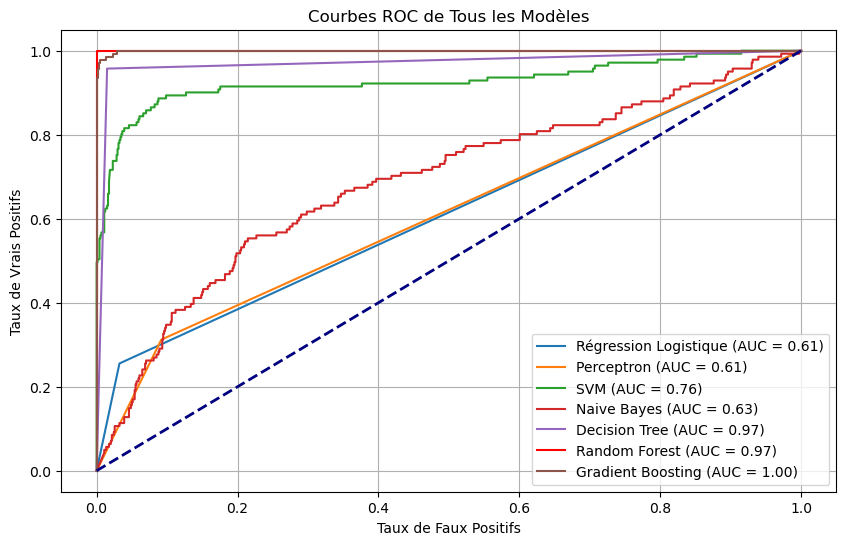

In [144]:
plt.figure(figsize=(10, 6))

# Courbes ROC pour chaque modèle
plt.plot(fpr_log_reg, tpr_log_reg, label=f"Régression Logistique (AUC = {roc_auc_log_reg:.2f})")
plt.plot(fpr_perceptron, tpr_perceptron, label=f"Perceptron (AUC = {roc_auc_perceptron:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_tree:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='red')
plt.plot(fpr_gbr, tpr_gbr, label=f"Gradient Boosting (AUC = {roc_auc_gbr:.2f})")

# Ligne de base
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Labels et titre
plt.title('Courbes ROC de Tous les Modèles')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
plt.show()


# Conclusion et compte rendu d

Après avoir effectué une transformation minutieuse des données, exploré et visualisé les différentes variables, puis entraîné et testé plusieurs modèles de machine learning, nous avons pu identifier les principaux facteurs contribuant à l'attrition des employés. Parmi les modèles testés, trois se sont particulièrement démarqués grâce à la pertinence de leurs prédictions. L'analyse des résultats a également révélé une grande cohérence entre les modèles, chacun mettant en lumière des variables similaires en termes d'importance. Cela nous permet de conclure que les variables ayant le plus grand impact sur l'attrition sont : les heures de travail quotidiennes (average_daily_hours), le nombre total d'années de travail (TotalWorkingYears), l'âge (Age), le revenu mensuel (MonthlyIncome), la satisfaction vis-à-vis de l'environnement de travail (EnvironmentSatisfaction), les années passées avec le manager actuel (YearsWithCurrManager), ainsi que le statut marital (MaritalStatus_Single). Cette convergence entre les modèles renforce la robustesse de nos conclusions et permet de mieux cibler les leviers d'action pour limiter l'attrition au sein de l'entreprise.

# Solutions pour réduire le taux de rotation des employés

Plusieurs solutions et stratégies peuvent être mises en place pour répondre à ce problème de manière efficace.


### 1. Amélioration de la satisfaction professionnelle
- **Écoute et feedback (EnvironmentSatisfaction) :** Utiliser les données de satisfaction environnementale pour identifier les domaines où des améliorations sont nécessaires et mettre en place des actions ciblées pour augmenter la satisfaction générale.
- **Reconnaissance des performances (MonthlyIncome) :** Un revenu mensuel compétitif et des primes peuvent être associés à des performances élevées pour valoriser les employés.
- **Perspectives de carrière (TotalWorkingYears, YearsWithCurrManager) :** Proposer des opportunités de développement de carrière en fonction de l'expérience accumulée (TotalWorkingYears) et des relations avec le manager (YearsWithCurrManager), afin de favoriser une croissance professionnelle continue.


### 2. Optimisation de la rémunération et des avantages
- **Alignement des salaires (MonthlyIncome) :** Comparer les salaires actuels avec les standards du marché et ajuster si nécessaire, en prenant en compte l'expérience professionnelle (TotalWorkingYears) et le statut marital (MaritalStatus_Single), pour mieux cibler les besoins spécifiques des employés.
- **Avantages sociaux :** Offrir des avantages en fonction de l'âge (Age) et de la situation familiale (MaritalStatus_Single) pour répondre aux attentes variées des employés.
- **Programmes d'incitation (MonthlyIncome) :** Mettre en place des primes de performance ou des bonus liés aux objectifs atteints, tout en garantissant une rémunération juste et compétitive pour motiver les employés à rester.


### 3. Amélioration de l'environnement de travail
- **Conditions de travail (EnvironmentSatisfaction) :** Améliorer les aspects de l'environnement de travail qui ont un impact direct sur la satisfaction des employés. Une analyse des scores de satisfaction par département ou équipe peut fournir des indicateurs sur les points à améliorer.
- **Équilibre travail-vie personnelle (Age, MaritalStatus_Single) :** Adapter les options de télétravail et de flexibilité en fonction de l'âge des employés et de leur statut marital, offrant plus de flexibilité pour ceux avec des enfants ou une famille à charge.
- **Climat organisationnel :** Créer une culture positive de communication et de respect qui incite les employés à s’engager sur le long terme.


### 4. Engagement et motivation des employés
- **Participation aux projets (TotalWorkingYears, YearsWithCurrManager) :** Impliquer davantage les employés expérimentés et ceux qui ont une relation solide avec leur manager dans des projets stratégiques pour augmenter leur engagement.
- **Activités d'équipe :** Organiser des événements de team building, en prenant en compte les préférences d'âge (Age) et les intérêts des employés pour maximiser leur participation.
- **Rôle clair et responsabilités :** S'assurer que les rôles et objectifs sont bien compris, en tenant compte de l’expérience (TotalWorkingYears) et des attentes des employés concernant leurs responsabilités.


### 5. Identification proactive des risques de départ
- **Analyse prédictive (Age, MonthlyIncome, EnvironmentSatisfaction, YearsWithCurrManager) :** Utiliser des modèles de machine learning pour identifier les employés à risque, en intégrant des variables comme l'âge, les années passées avec le manager actuel et leur satisfaction vis-à-vis de l'environnement de travail.
- **Entretiens réguliers (TotalWorkingYears, MaritalStatus_Single) :** Organiser des entretiens de rétention pour mieux comprendre les motivations des employés en fonction de leur ancienneté et de leur situation familiale.
- **Plan d’action ciblé :** Développer des solutions personnalisées pour les employés à risque, en fonction de leur rémunération (MonthlyIncome) et de leur expérience (TotalWorkingYears).


### 6. Renforcement du processus d'intégration
- **Onboarding structuré :** Créer un processus d’intégration adapté à l’expérience professionnelle (TotalWorkingYears) et aux attentes spécifiques des nouveaux employés, en intégrant des aspects personnalisés selon leur statut marital (MaritalStatus_Single).
- **Mentorat et accompagnement :** Assigner des mentors en fonction de l’expérience professionnelle (TotalWorkingYears) et des besoins d’accompagnement.
- **Suivi de l'intégration (Age, YearsWithCurrManager) :** Recueillir des retours réguliers après les premiers mois pour ajuster le processus, avec un focus sur les nouveaux employés et leur expérience avec leurs managers (YearsWithCurrManager).


### 7. Culture d'entreprise forte et attractive
- **Valeurs et mission :** Communiquer une vision claire qui résonne avec les employés, en tenant compte de leurs différents âges (Age) et de leurs expériences professionnelles (TotalWorkingYears).
- **Marque employeur :** Développer une marque attractive qui valorise l'engagement des employés et reflète leurs aspirations.
- **Transparence et communication :** Renforcer la communication ouverte sur les résultats et les défis de l'entreprise pour maintenir une culture de transparence et de confiance.


### 8. Réduction de la charge de travail excessive
- **Répartition équitable des tâches (Age, TotalWorkingYears) :** Identifier les déséquilibres dans la charge de travail en tenant compte de l'expérience professionnelle et de l'âge des employés, afin de mieux gérer la pression.
- **Optimisation des processus :** Automatiser les tâches répétitives pour améliorer l'efficacité des employés, permettant ainsi une meilleure gestion de la charge de travail.
- **Gestion du stress (EnvironmentSatisfaction) :** Proposer des initiatives pour gérer le stress et améliorer le bien-être des employés, en fonction de leurs niveaux de satisfaction au travail.
